In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
paths = ["extendedDS"]

ds = pd.DataFrame()

for path in paths:
    for file_name in os.listdir(path):
        try:
            temp = pd.read_csv(path + "//" + file_name, index_col='dateandtime',parse_dates=True)
            ds = ds.append(temp)
        except:
            ...

    

C:\Users\Almodather\AppData\Local\Temp\ipykernel_8100\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_8100\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_8100\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_8100\1699952277.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ds = ds.append(temp)
C:\Users\Almodather\AppData\Local\Temp\ipykernel_8100\1699952277.py:9: FutureWarning: The fr

In [5]:
ds.tail()

spdK/m          edge  vehDen
dateandtime                                         
2022-12-12 10:01:00  31.567421  -675093183#1     690
2022-12-12 10:01:00  48.207485   182371964#2     690
2022-12-12 10:01:00  41.764732    32659640#2     690
2022-12-12 10:01:00  48.852222   765656383#0     690
2022-12-12 10:01:00  55.326605    37099139#0     690

## LSTM on Every edge with Freq > 90%

In [3]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

In [4]:
temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '16T'  #one reading every 10 mins
                      )]
          ).mean()

In [20]:
temp

edge                 -178543139#2  -182371966#0  -182371966#4  -182371966#5  \
dateandtime                                                                   
2022-12-06 00:00:00           NaN           NaN           NaN           NaN   
2022-12-06 00:16:00           NaN           NaN           NaN     28.034380   
2022-12-06 00:32:00           NaN           NaN           NaN           NaN   
2022-12-06 00:48:00           NaN           NaN           NaN           NaN   
2022-12-06 01:04:00           NaN           NaN     46.397426           NaN   
...                           ...           ...           ...           ...   
2022-12-20 22:40:00     35.128506           NaN     42.289938     42.260171   
2022-12-20 22:56:00           NaN     43.336928     23.931795           NaN   
2022-12-20 23:12:00     48.994896     53.318098           NaN     43.861448   
2022-12-20 23:28:00     40.297550     45.539944           NaN     42.079136   
2022-12-20 23:44:00     48.232330           NaN           NaN     59.032482   

edge                 -182371968#5  -215628990#0  -215628990#1  -215628990#2  \
dateandtime                                                                   
2022-12-06 00:00:00           NaN           NaN           NaN     46.001526   
2022-12-06 00:16:00           NaN           NaN           NaN           NaN   
2022-12-06 00:32:00     51.048107           NaN     53.661565     50.355927   
2022-12-06 00:48:00           NaN           NaN           NaN     49.137622   
2022-12-06 01:04:00           NaN           NaN     45.168440           NaN   
...                           ...           ...           ...           ...   
2022-12-20 22:40:00           NaN           NaN     46.754271     49.576151   
2022-12-20 22:56:00           NaN           NaN     47.113703     50.652035   
2022-12-20 23:12:00     37.867871     50.596277     45.294676     44.241876   
2022-12-20 23:28:00           NaN           NaN     45.238868     39.833059   
2022-12-20 23:44:00     46.232260           NaN     48.470980     42.409406   

edge                 -215628990#3  -215628998#0  ...  958778139#0  \
dateandtime                                      ...                
2022-12-06 00:00:00           NaN           NaN  ...          NaN   
2022-12-06 00:16:00     48.353332     49.254459  ...          NaN   
2022-12-06 00:32:00           NaN           NaN  ...          NaN   
2022-12-06 00:48:00           NaN           NaN  ...          NaN   
2022-12-06 01:04:00           NaN           NaN  ...          NaN   
...                           ...           ...  ...          ...   
2022-12-20 22:40:00           NaN     24.323014  ...    55.535058   
2022-12-20 22:56:00           NaN           NaN  ...          NaN   
2022-12-20 23:12:00           NaN           NaN  ...          NaN   
2022-12-20 23:28:00           NaN     50.537367  ...    45.651611   
2022-12-20 23:44:00           NaN           NaN  ...          NaN   

edge                 958778139#0-AddedOnRampEdge  958778139#1  971350102#1  \
dateandtime                                                                  
2022-12-06 00:00:00                          NaN          NaN          NaN   
2022-12-06 00:16:00                    44.616810          NaN          NaN   
2022-12-06 00:32:00                          NaN          NaN    40.428775   
2022-12-06 00:48:00                          NaN          NaN          NaN   
2022-12-06 01:04:00                          NaN          NaN          NaN   
...                                          ...          ...          ...   
2022-12-20 22:40:00                    42.677849    46.673834    45.180725   
2022-12-20 22:56:00                    46.100435          NaN    40.532296   
2022-12-20 23:12:00                    45.746527          NaN    50.748310   
2022-12-20 23:28:00                    45.027230          NaN          NaN   
2022-12-20 23:44:00                     0.000000          NaN          NaN   

edge                 :793793078

In [21]:
temp.count().sort_values(ascending=False)

edge
858935309        1350
858935302        1350
858935315        1348
700673538        1341
652130052        1339
                 ... 
894550197#3       829
37789107#3        827
:8771565273_2     770
25584589#2        764
51799432#2        739
Length: 407, dtype: int64

In [5]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                                              1014
-182371948#0                                               570
-182371948#1                                               355
-182371948#2                                               384
-182371955#0                                               659
                                                          ... 
:cluster_7937296083_8074011466_8074011468_2                416
:cluster_7937296083_8074011466_8074011468_6                514
:cluster_7937296083_8074011466_8074011468_7                329
:cluster_8279196058_8279196059_0                           431
:cluster_8574575726_8574575729_8574575735_8574575737_2     762
Length: 1788, dtype: int64

In [23]:
#fillna with max insteadx

In [6]:
df = temp.fillna(temp.max())

In [7]:
df = df.loc[:, (temp != 0).any(axis=0)]


In [8]:
# Compute the variance of each column in the dataframe
variances = df.var()

# Find the columns with variances greater than 100
high_variances = variances[variances > 100]

# Print the columns with variances greater than 100
print(high_variances)

edge
-182371948#0                                   162.047829
-182371955#0                                   610.526750
-182371955#1                                   111.809639
-182371956#1                                   153.969455
-182371959#0                                   145.708894
                                                  ...    
:cluster_6570524682_6570524683_1               105.651847
:cluster_6570524682_6570524683_3               155.084661
:cluster_6570524682_6570524683_5               169.256801
:cluster_7937296083_8074011466_8074011468_6    133.015878
:cluster_8279196058_8279196059_0               103.632834
Length: 634, dtype: float64


In [9]:
filtered_df = df.loc[:, high_variances.index]

In [612]:
filtered_df.shape

(1350, 634)

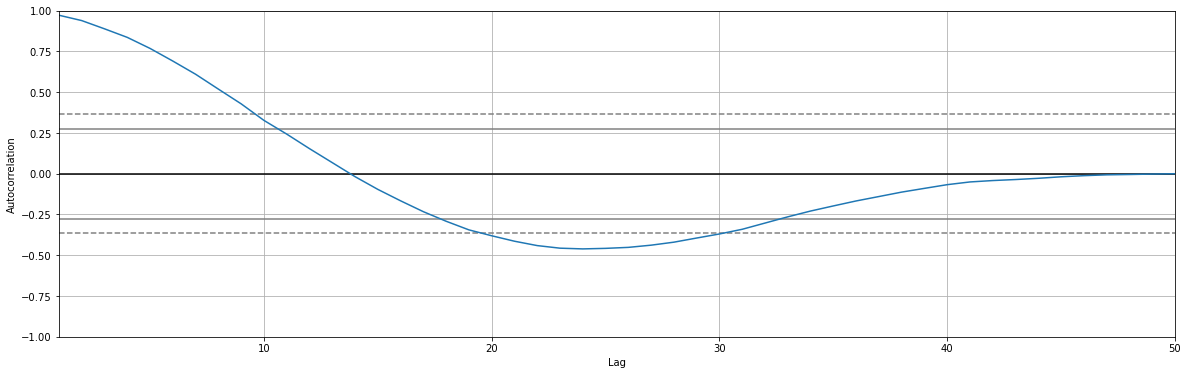

In [160]:
plt.figure(figsize=(20,6))
x = pd.plotting.autocorrelation_plot(smoothed_df[0][0:50])
x.plot()
# plt.ylim(-0.2,0.2)
plt.show()


In [687]:
#Smooth curve
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, 
                           mode='valid'
                          )
    return y_smooth

In [702]:
dataset = []
for cntrDf in range(0, filtered_df.shape[-1]):
    dataset.append(smooth(filtered_df.values[:,cntrDf],10))

In [689]:
from sklearn.preprocessing import MinMaxScaler


In [703]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
smoothed_df = scaler.fit_transform(np.array(dataset).T)
# smoothed_df = np.array(smoothed_df).T

In [692]:
def train_test_split_smoothed(dataset, ratio):
    train=[]
    test=[]
    length = np.asarray(dataset).shape[0] 
    
    train_size = int(length * ratio)
    test_size = length - train_size
    train = dataset[:train_size]
    test =  dataset[train_size:]
        
    test = np.asarray(test)
    train = np.asarray(train)
    
    return train,test

In [693]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    # reshape input to be [samples, time steps, features]
    dataX=np.array(dataX)
    
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1], dataX.shape[-1]))

    return dataX, np.array(dataY)
  



In [694]:
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import math

In [695]:
def create_model(lookback,train,val,test,hidden_states):
    # How many record to take into account
    features = train.shape[-1]


    # Define the model
    model = Sequential()

    # Add LSTM layers
    # hidden_states = 100
    model.add(LSTM(hidden_states,  input_shape=(lookback,features)))
    # Add feedforward hidden layer

    # Add output layer
    model.add(Dense(features))

    # Compile the model
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')

    
    return model

In [696]:
def plot_graphs(actual,predicted,lookback, index):
    plt.rcParams["figure.figsize"] = (30,15)
    plt.plot(actual[lookback+1:,index])

    plt.plot(predicted[:,index],lw=1)
    print(predicted.shape)
    #plt.legend(['actual data','Predicted data'],loc='best')
    # plt.xlim([0, 700])
    plt.show()

In [607]:
models =[]
mse_values = []

def train_model_lookback(look_back,lb_start,lb_end,train,val,test):
    trainX, trainY = create_dataset(train, look_back)
    val_X, val_Y = create_dataset(val, look_back)
    test_X, test_Y = create_dataset(test, look_back)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

    for hidden_states in range(lb_start,lb_end,10):
        
        model = create_model(look_back,train_X,val_X,test_X,hidden_states)
        

        model.fit(trainX,trainY,epochs=30, 
                  validation_data=(val_X,val_Y),
                  callbacks=callback
                  )
        
        models.append(model)
        
        trainPredict = model.predict(trainX)
        validPredict = model.predict(val_X)
        testPredict = model.predict(test_X)
        
        
        # calculate root mean squared error
        trainScore = math.sqrt(mean_squared_error(train[look_back+1:,0], trainPredict[:,0]))
        print('Train Score: %.5f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(test[look_back+1:,0], testPredict[:,0]))
        print('Test Score: %.5f RMSE' % (testScore))        
        mse_values.append(testScore)

        
        print("hidden_states = " , hidden_states , "mae = ", testScore)
        try:
            plot_graphs(train,trainPredict,lookback, 0)
            plot_graphs(val,validPredict,lookback, 0)
            plot_graphs(test,testPredict,lookback, 0)
        except:
            ...
    return models, mse_values, trainPredict, validPredict, validPredict

Epoch 1/30
14/14 [==============================] - 4s 124ms/step - loss: 0.3255 - val_loss: 0.1117
Epoch 2/30
14/14 [==============================] - 1s 38ms/step - loss: 0.0807 - val_loss: 0.0710
Epoch 3/30
14/14 [==============================] - 1s 38ms/step - loss: 0.0549 - val_loss: 0.0630
Epoch 4/30
14/14 [==============================] - 1s 38ms/step - loss: 0.0483 - val_loss: 0.0622
Epoch 5/30
14/14 [==============================] - 1s 39ms/step - loss: 0.0483 - val_loss: 0.0600
Epoch 6/30
14/14 [==============================] - 1s 37ms/step - loss: 0.0463 - val_loss: 0.0640
Epoch 7/30
14/14 [==============================] - 1s 38ms/step - loss: 0.0487 - val_loss: 0.0609
Epoch 8/30
14/14 [==============================] - 1s 40ms/step - loss: 0.0447 - val_loss: 0.0616
Epoch 9/30
14/14 [==============================] - 1s 40ms/step - loss: 0.0462 - val_loss: 0.0618
Epoch 10/30
14/14 [==============================] - 1s 38ms/step - loss: 0.0440 - val_loss: 0.0609
Epoch 11

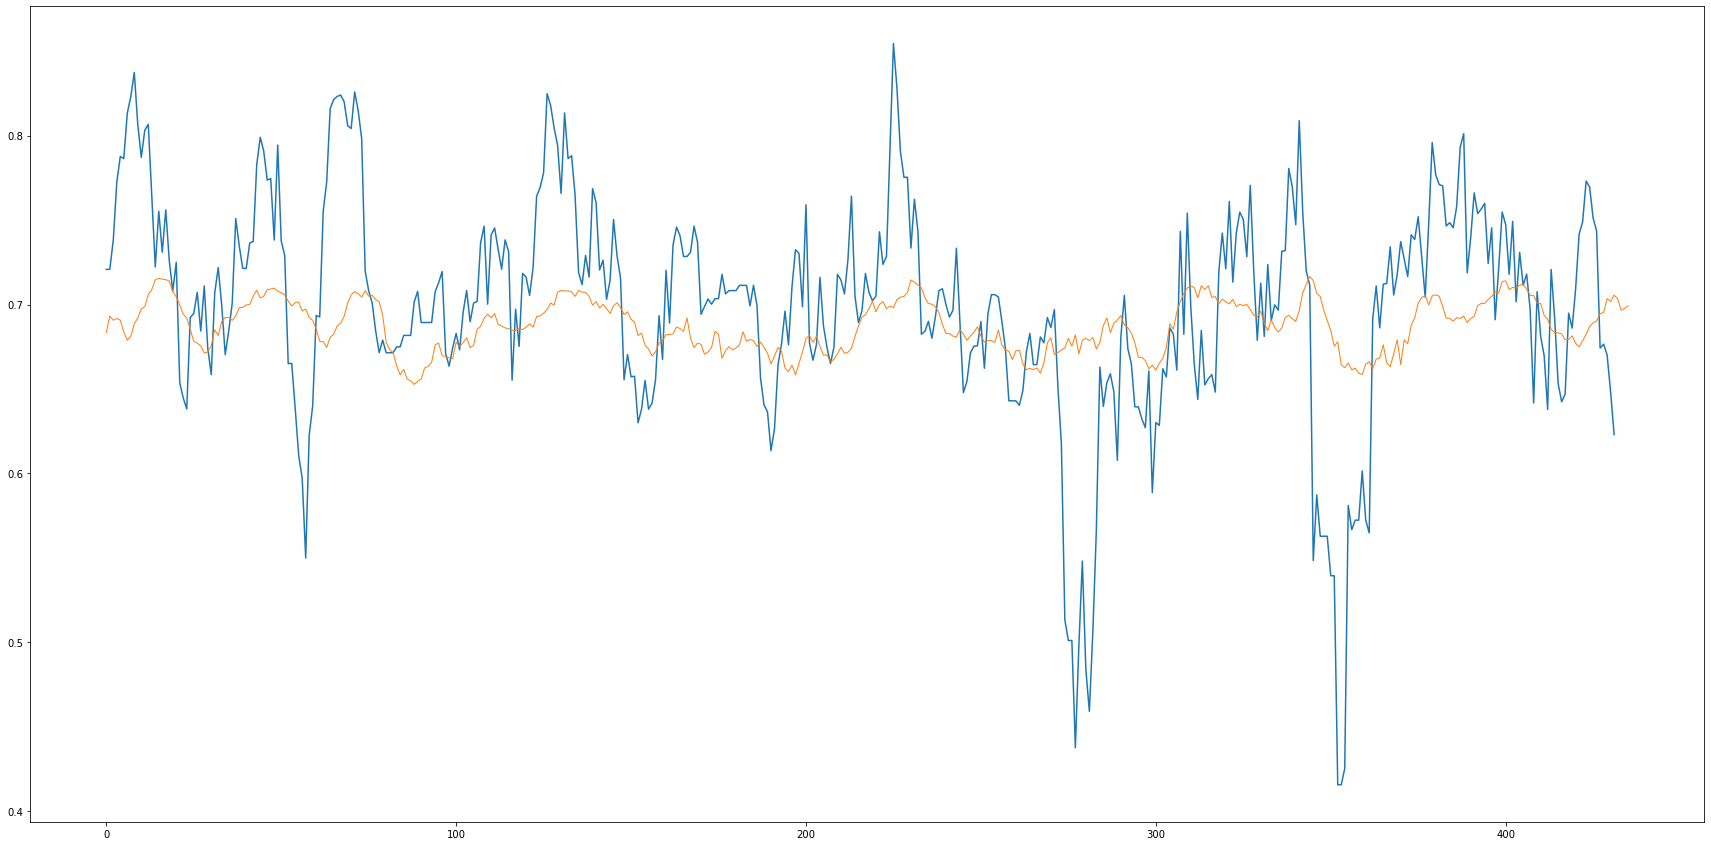

(443, 634)


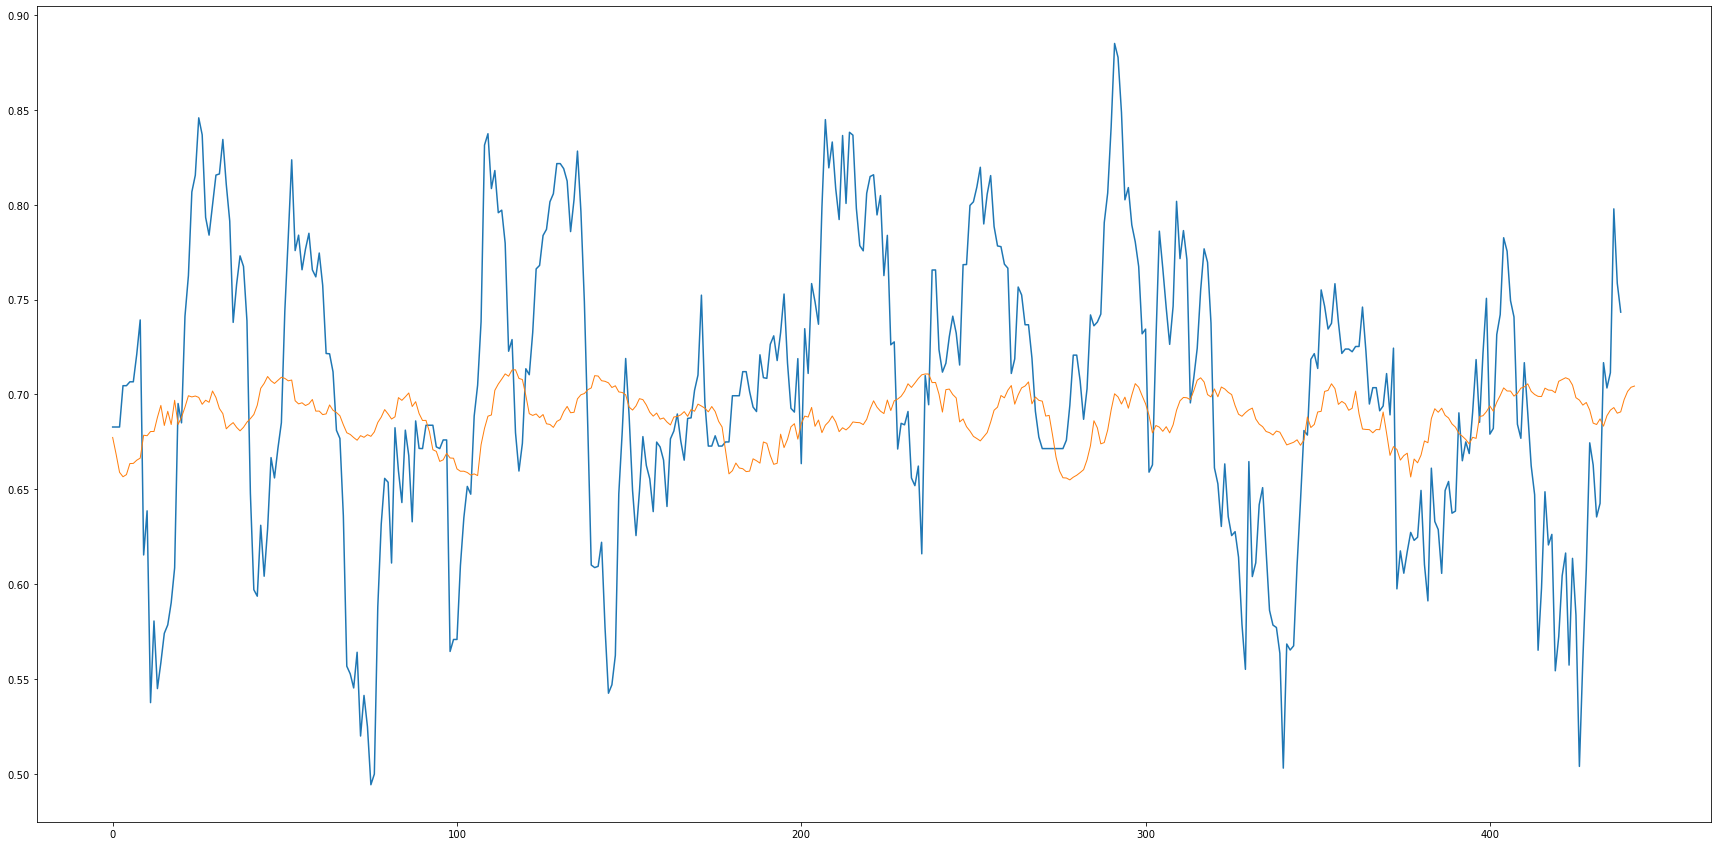

(444, 634)


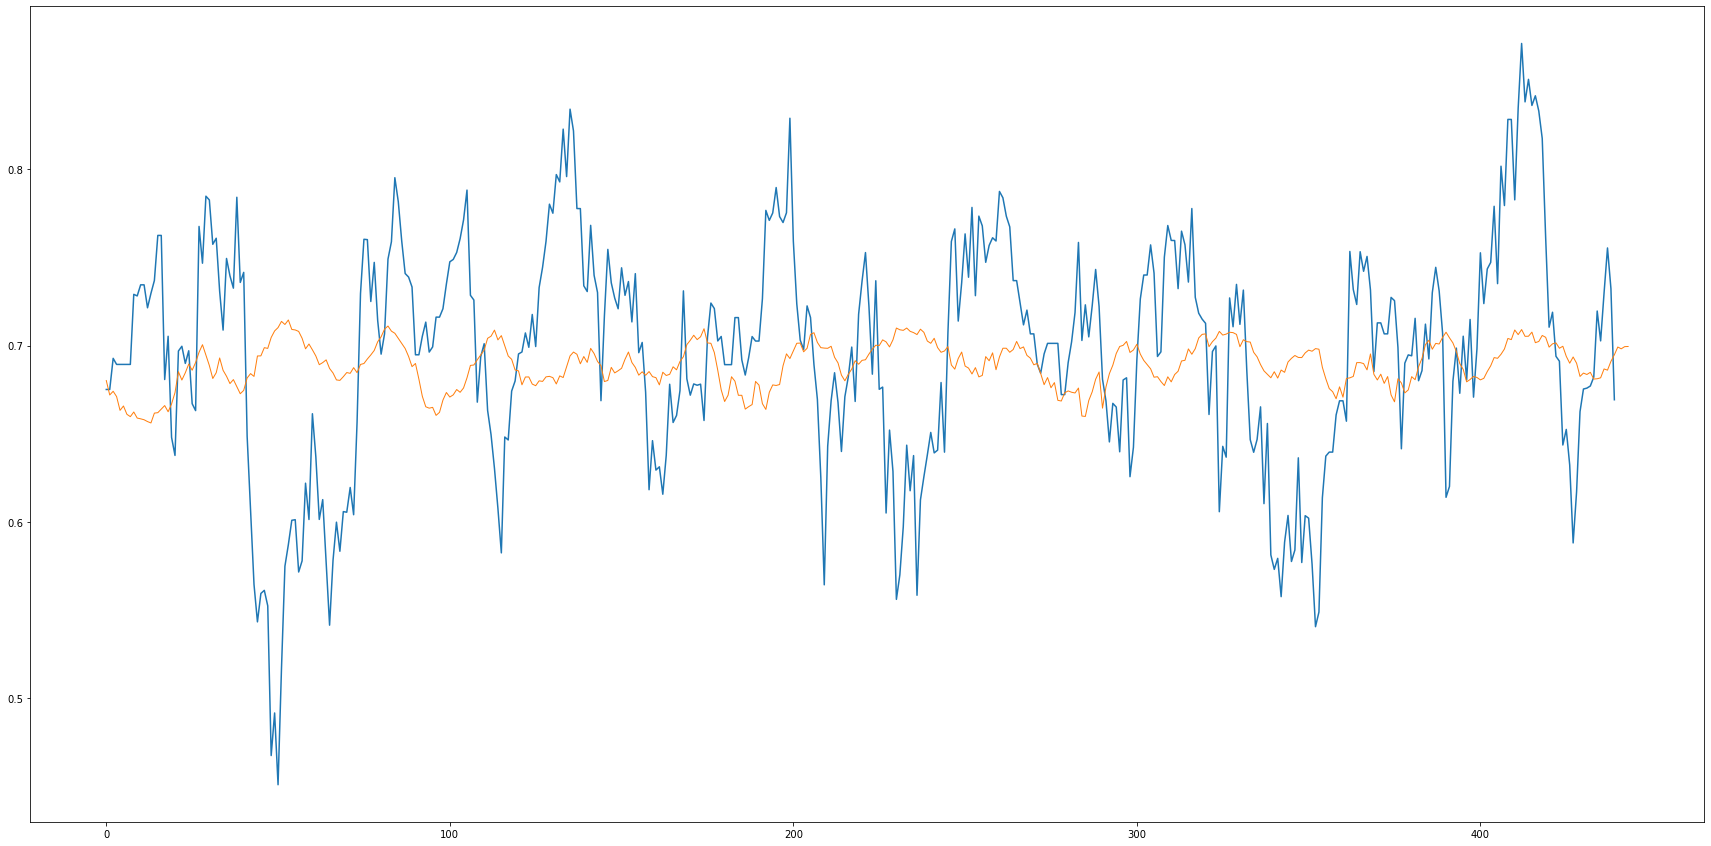

Epoch 1/30
14/14 [==============================] - 5s 109ms/step - loss: 0.3141 - val_loss: 0.1041
Epoch 2/30
14/14 [==============================] - 1s 43ms/step - loss: 0.0776 - val_loss: 0.0695
Epoch 3/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0538 - val_loss: 0.0624
Epoch 4/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0496 - val_loss: 0.0636
Epoch 5/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0467 - val_loss: 0.0648
Epoch 6/30
14/14 [==============================] - 1s 40ms/step - loss: 0.0476 - val_loss: 0.0618
Epoch 7/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0444 - val_loss: 0.0603
Epoch 8/30
14/14 [==============================] - 1s 40ms/step - loss: 0.0453 - val_loss: 0.0666
Epoch 9/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0495 - val_loss: 0.0599
Epoch 10/30
14/14 [==============================] - 1s 40ms/step - loss: 0.0445 - val_loss: 0.0597
Epoch 11

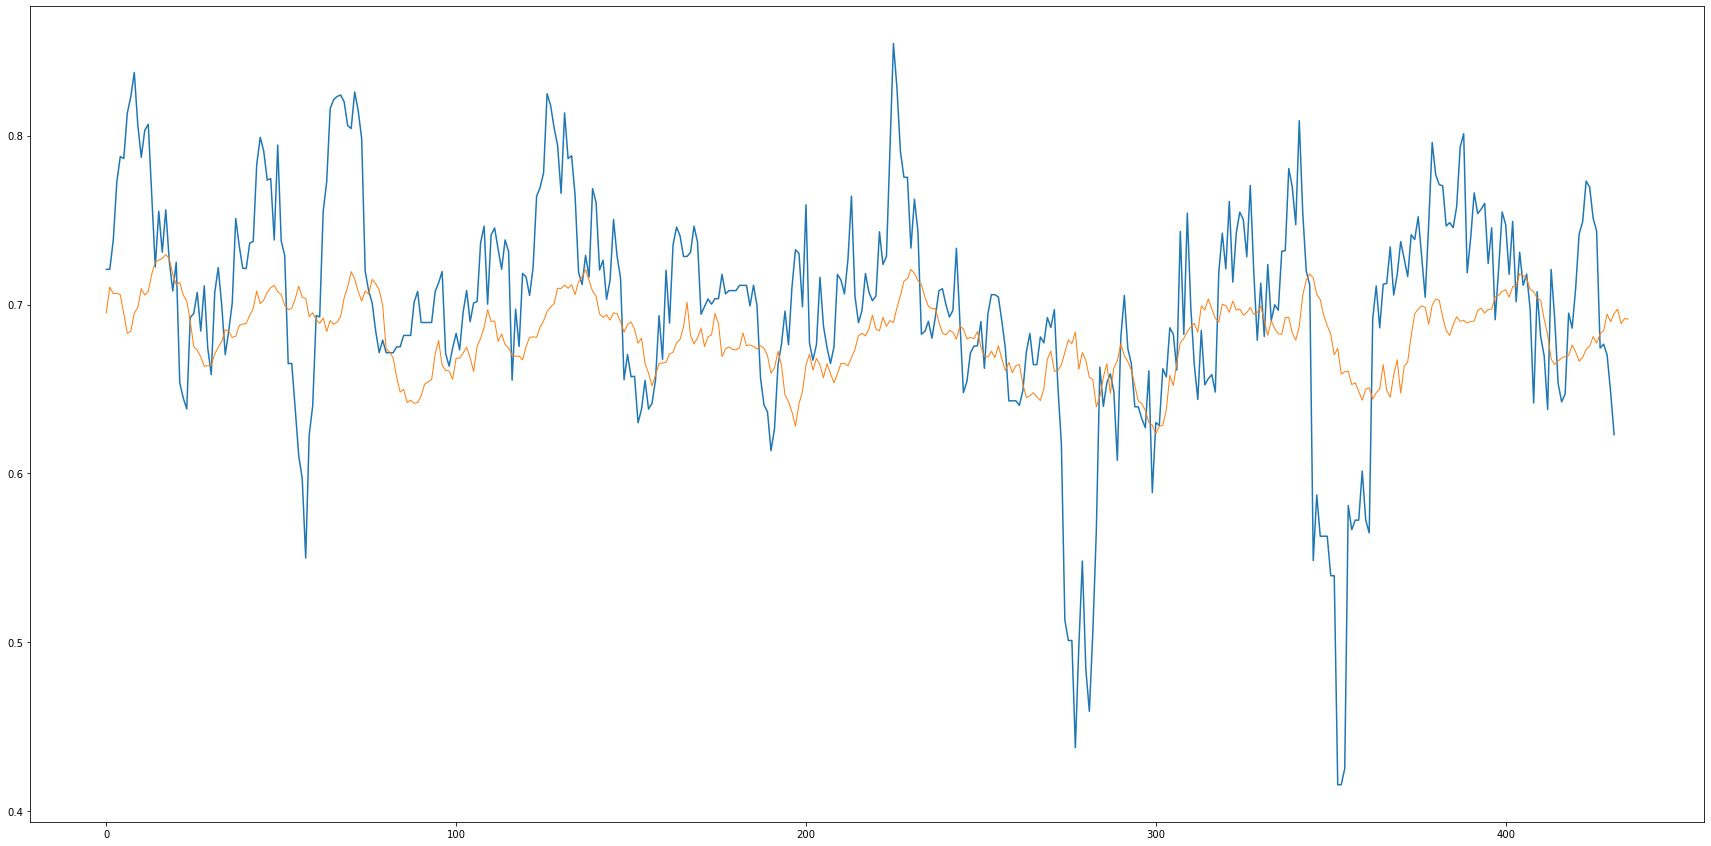

(443, 634)


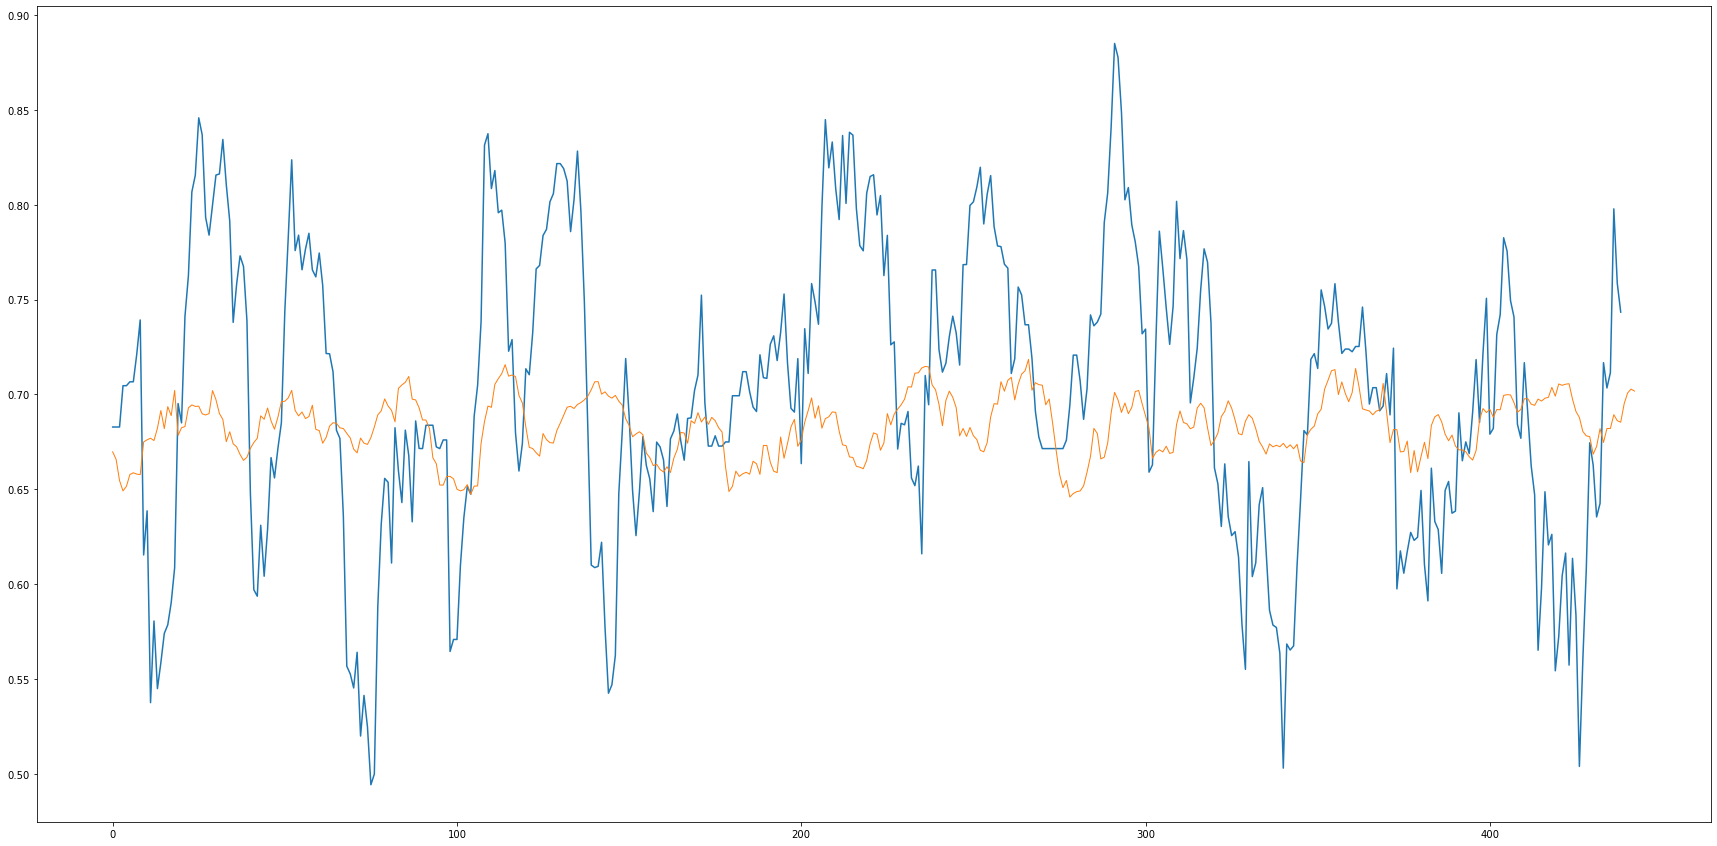

(444, 634)


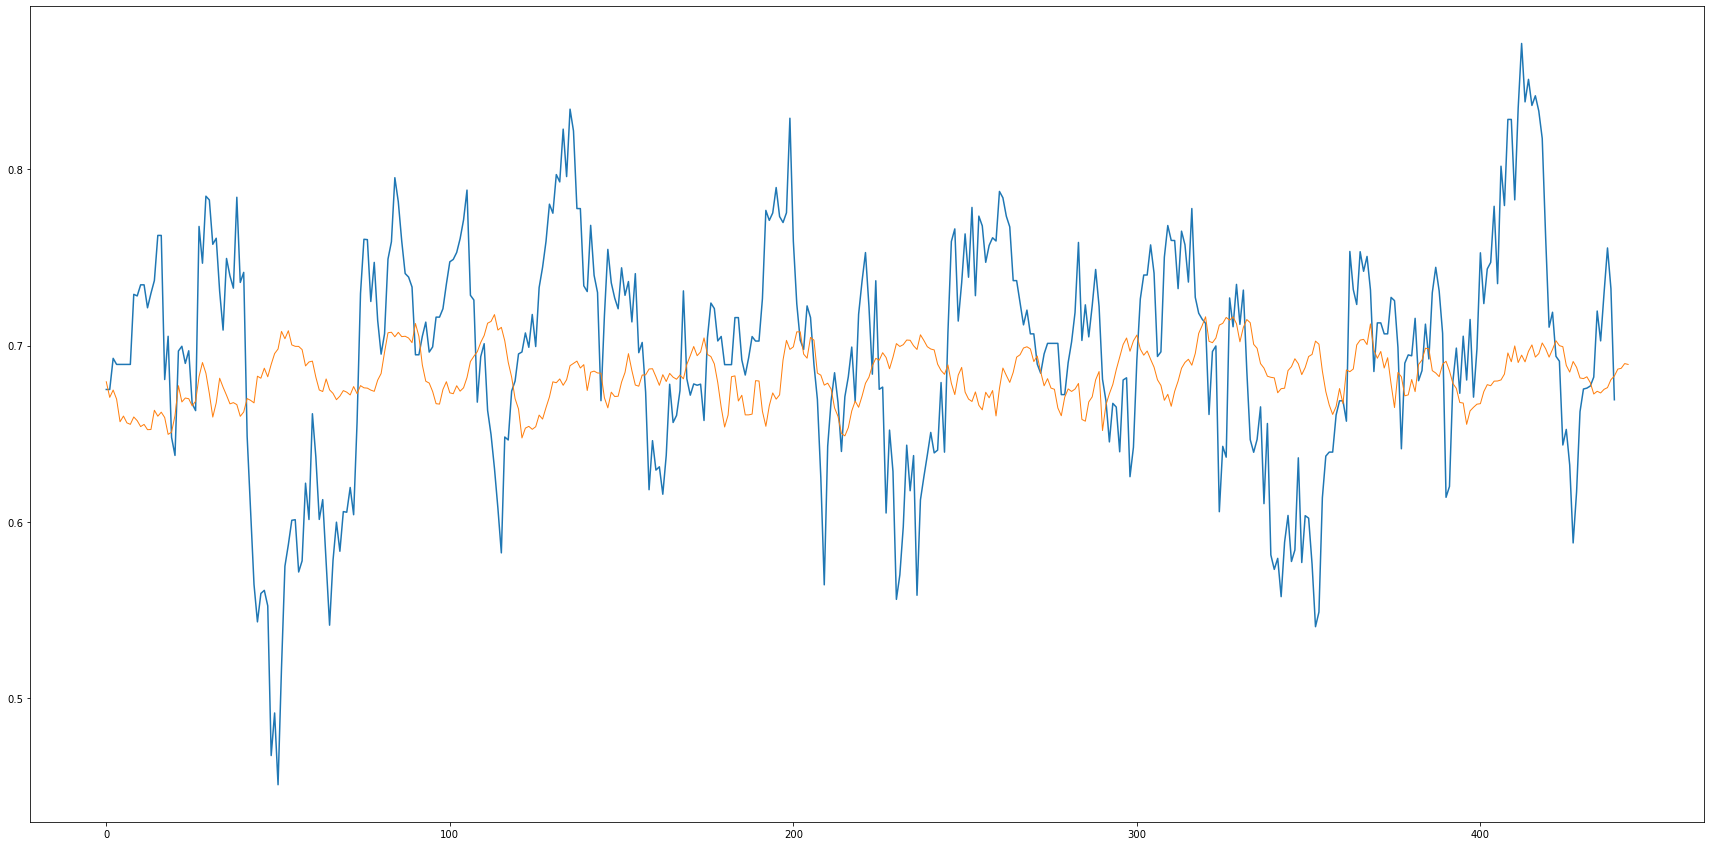

Epoch 1/30
14/14 [==============================] - 5s 102ms/step - loss: 0.2927 - val_loss: 0.1025
Epoch 2/30
14/14 [==============================] - 1s 42ms/step - loss: 0.0744 - val_loss: 0.0680
Epoch 3/30
14/14 [==============================] - 1s 41ms/step - loss: 0.0529 - val_loss: 0.0646
Epoch 4/30
14/14 [==============================] - 1s 42ms/step - loss: 0.0470 - val_loss: 0.0605
Epoch 5/30
14/14 [==============================] - 1s 42ms/step - loss: 0.0462 - val_loss: 0.0602
Epoch 6/30
14/14 [==============================] - 1s 42ms/step - loss: 0.0439 - val_loss: 0.0594
Epoch 7/30
14/14 [==============================] - 1s 42ms/step - loss: 0.0453 - val_loss: 0.0729
Epoch 8/30
14/14 [==============================] - 1s 43ms/step - loss: 0.0502 - val_loss: 0.0611
Epoch 9/30
14/14 [==============================] - 1s 45ms/step - loss: 0.0455 - val_loss: 0.0655
Epoch 10/30
14/14 [==============================] - 1s 44ms/step - loss: 0.0464 - val_loss: 0.0598
Epoch 11

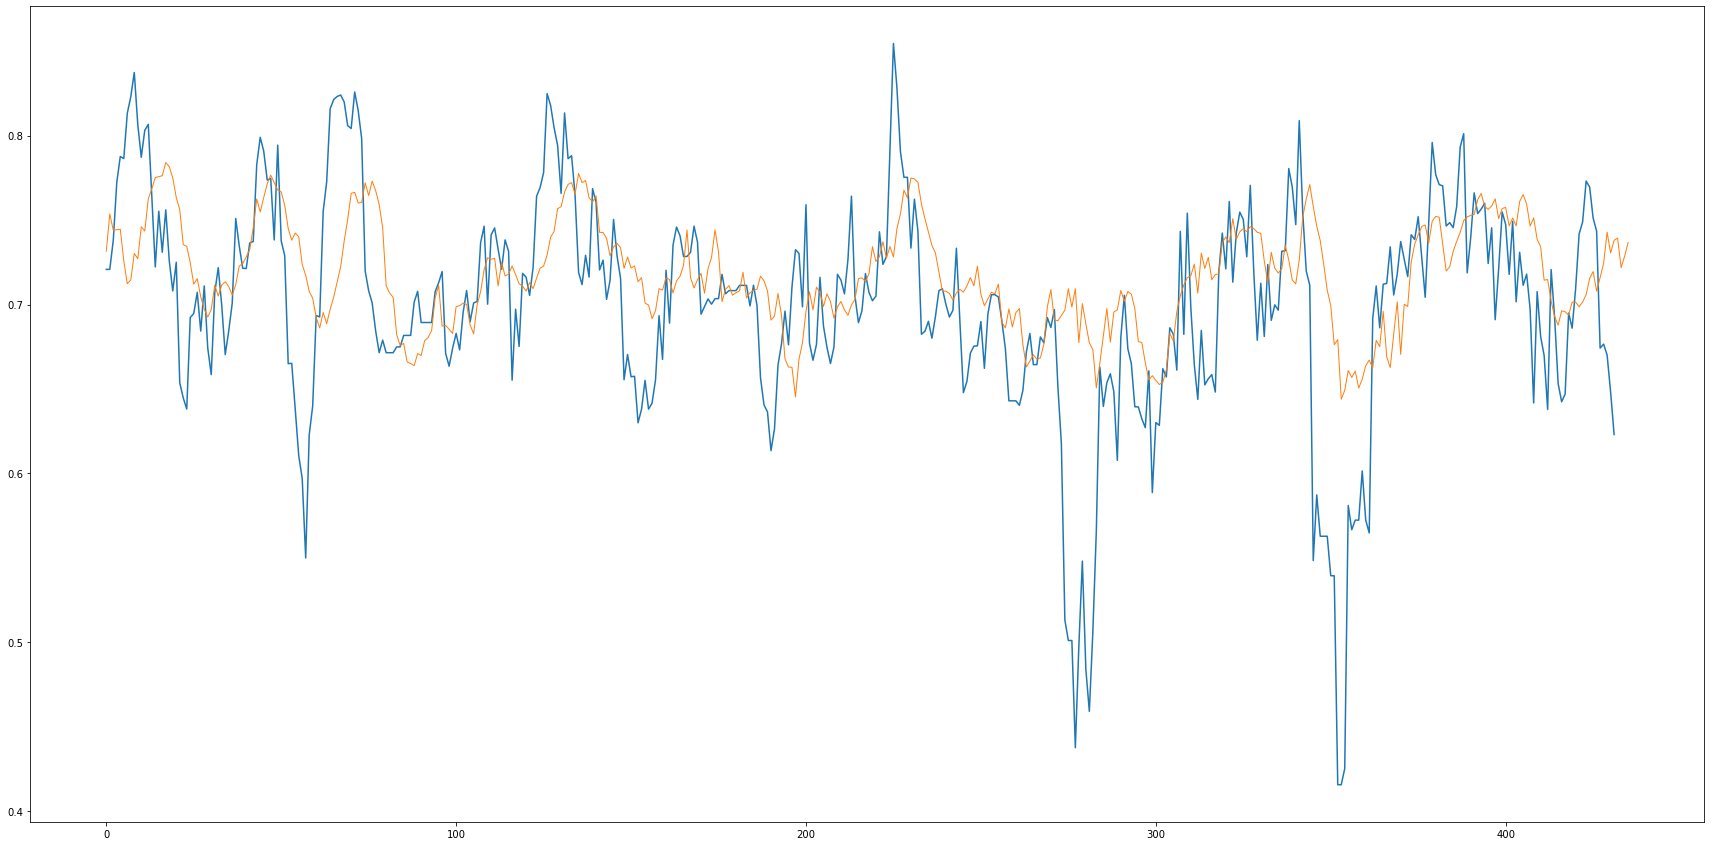

(443, 634)


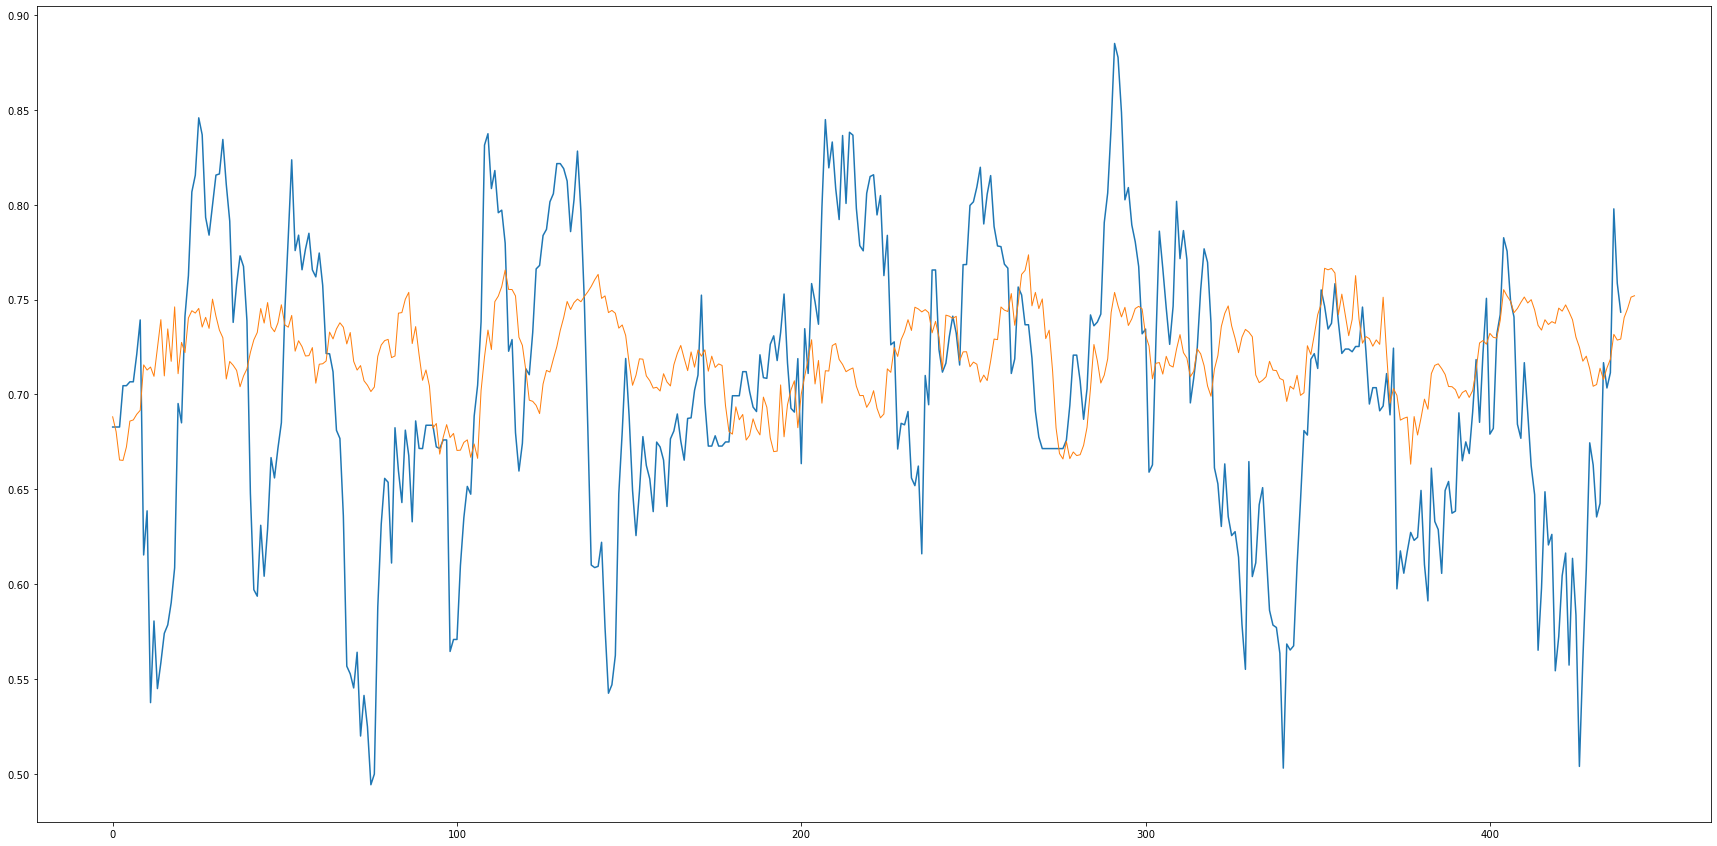

(444, 634)


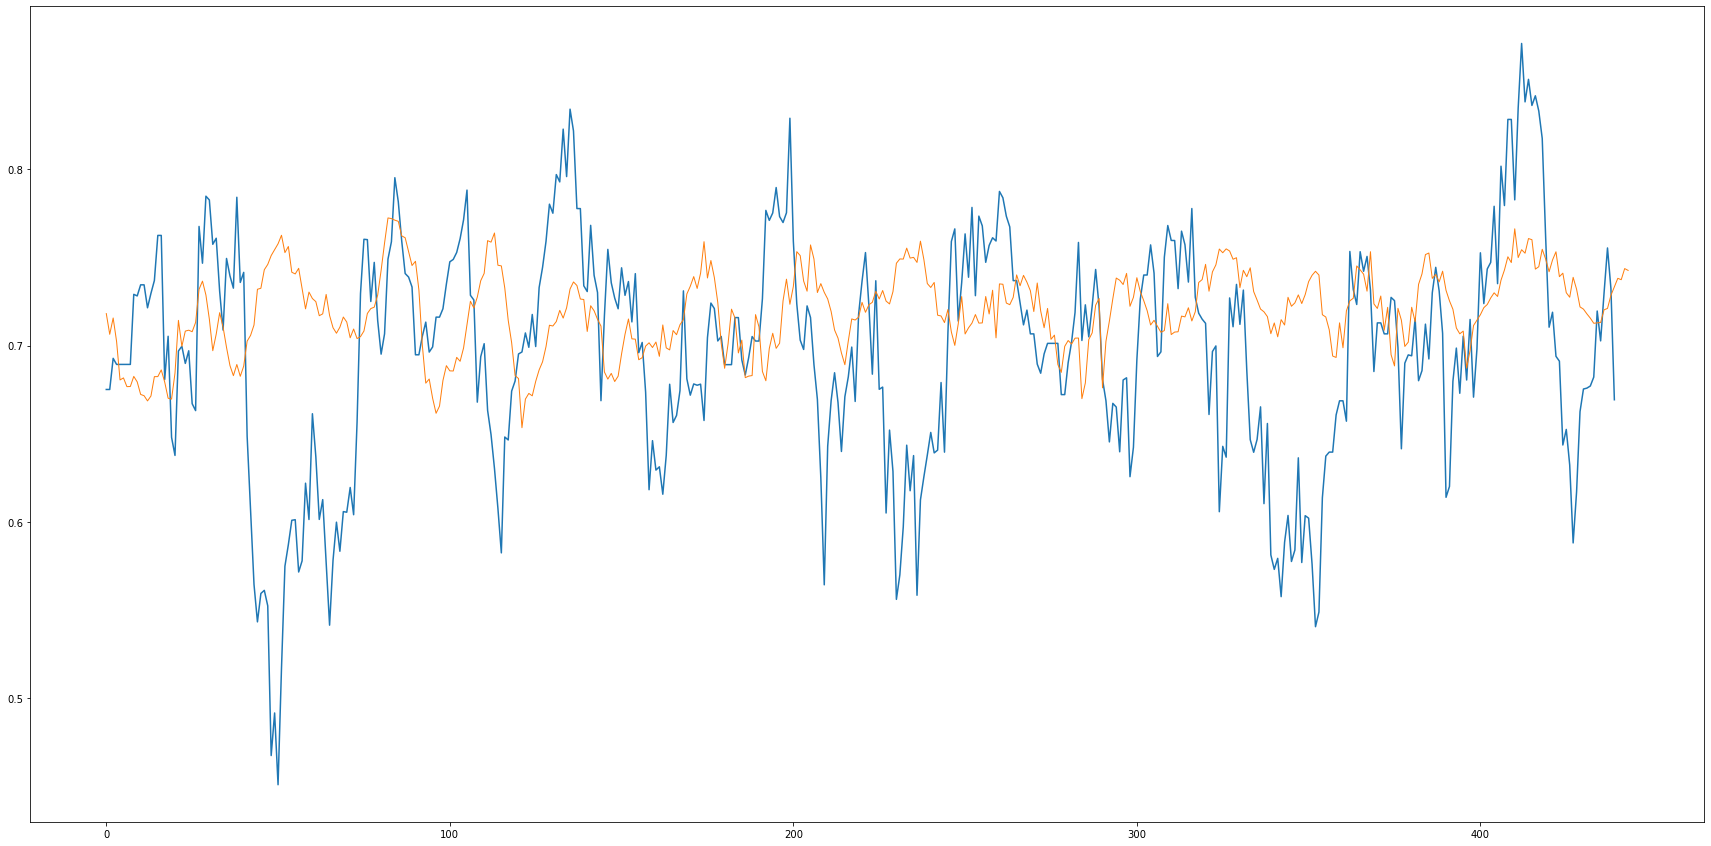

In [516]:
train,ds = train_test_split_smoothed(smoothed_df,0.33)
val,test = train_test_split_smoothed(ds.T,0.5)
models, mse_values ,trainPredict, validPredict, validPredict= train_model_lookback(5,150,180,train,val,test)

In [697]:
def train_model(look_back,hidden_states,train,val,test):
    
    trainX, trainY = create_dataset(train, look_back)
    val_X, val_Y = create_dataset(val, look_back)
    test_X, test_Y = create_dataset(test, look_back)
    
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15)

    
    model = create_model(look_back,train_X,val_X,test_X,hidden_states)
    

    model.fit(trainX,trainY,epochs=300, 
              validation_data=(val_X,val_Y),
              callbacks=callback
              )
    
    
    trainPredict = model.predict(trainX)
    validPredict = model.predict(val_X)
    testPredict = model.predict(test_X)
    
    
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(train[look_back+1:,0], trainPredict[:,0]))
    print('Train Score: %.5f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(test[look_back+1:,0], testPredict[:,0]))
    print('Test Score: %.5f RMSE' % (testScore))        
    mse_values.append(testScore)

    
    print("hidden_states = " , hidden_states , "mae = ", testScore)
    try:
        plot_graphs(train,trainPredict,look_back, 0)
        plot_graphs(val,validPredict,look_back, 0)
        plot_graphs(test,testPredict,look_back, 0)
    except:
        ...
    return model, mse_values, trainPredict, validPredict, testPredict

Epoch 1/300
21/21 [==============================] - 2s 40ms/step - loss: 0.2754 - val_loss: 0.1678
Epoch 2/300
21/21 [==============================] - 1s 24ms/step - loss: 0.1070 - val_loss: 0.1216
Epoch 3/300
21/21 [==============================] - 0s 22ms/step - loss: 0.0943 - val_loss: 0.1408
Epoch 4/300
21/21 [==============================] - 0s 20ms/step - loss: 0.1027 - val_loss: 0.1235
Epoch 5/300
21/21 [==============================] - 0s 21ms/step - loss: 0.0822 - val_loss: 0.1195
Epoch 6/300
21/21 [==============================] - 0s 20ms/step - loss: 0.0798 - val_loss: 0.1151
Epoch 7/300
21/21 [==============================] - 0s 20ms/step - loss: 0.0789 - val_loss: 0.1191
Epoch 8/300
21/21 [==============================] - 0s 20ms/step - loss: 0.0734 - val_loss: 0.1179
Epoch 9/300
21/21 [==============================] - 0s 21ms/step - loss: 0.0721 - val_loss: 0.1263
Epoch 10/300
21/21 [==============================] - 0s 21ms/step - loss: 0.0689 - val_loss: 0.1106

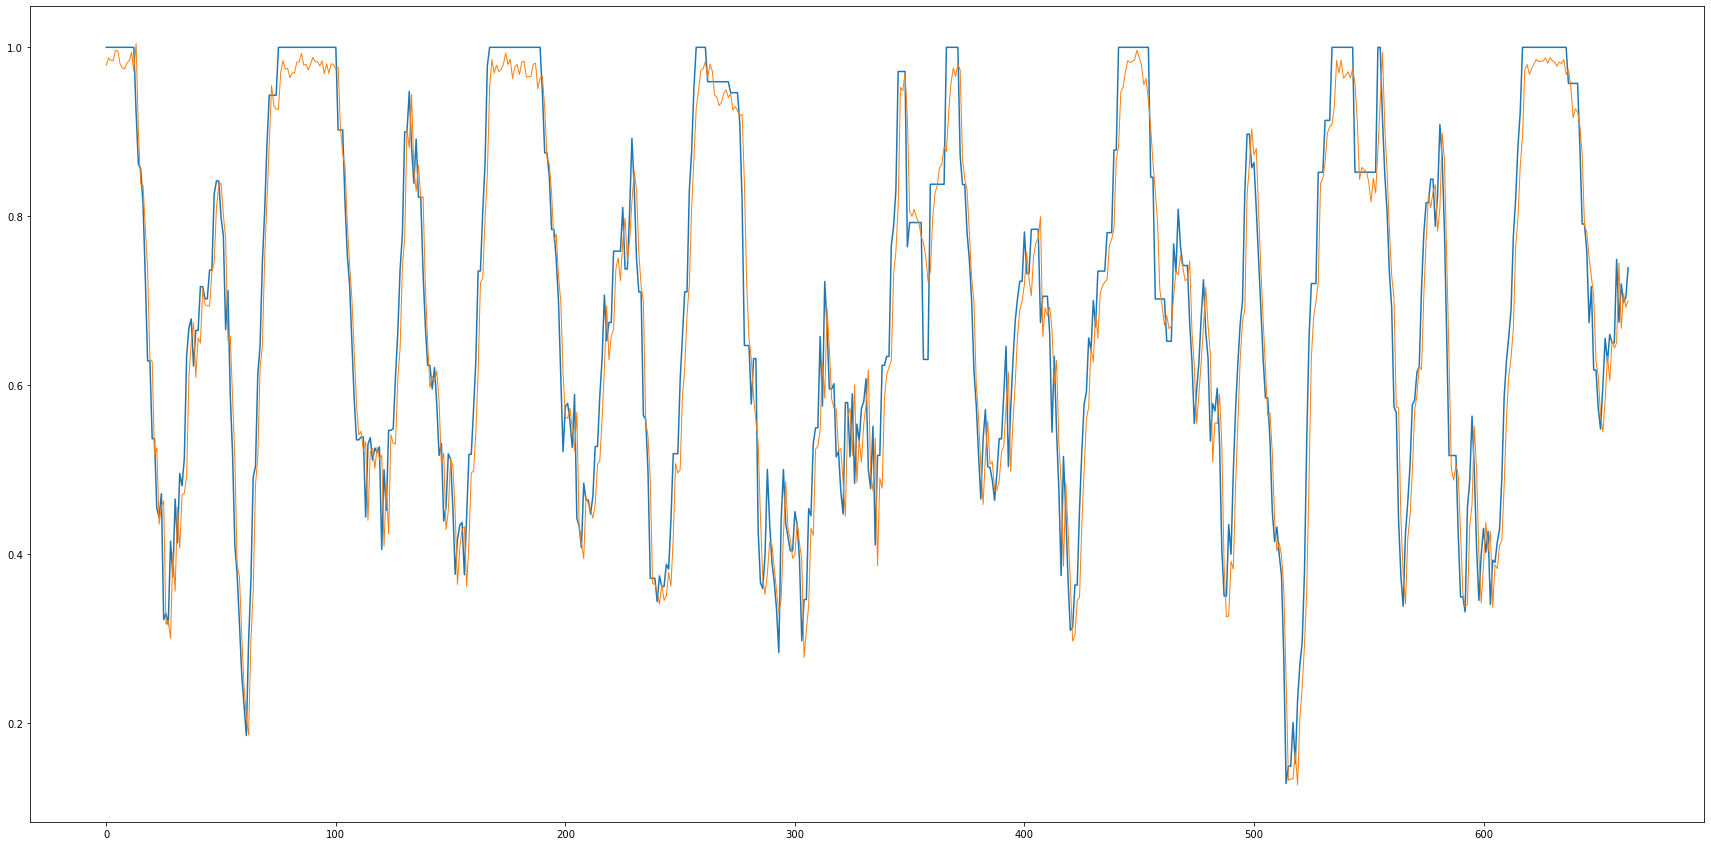

(329, 634)


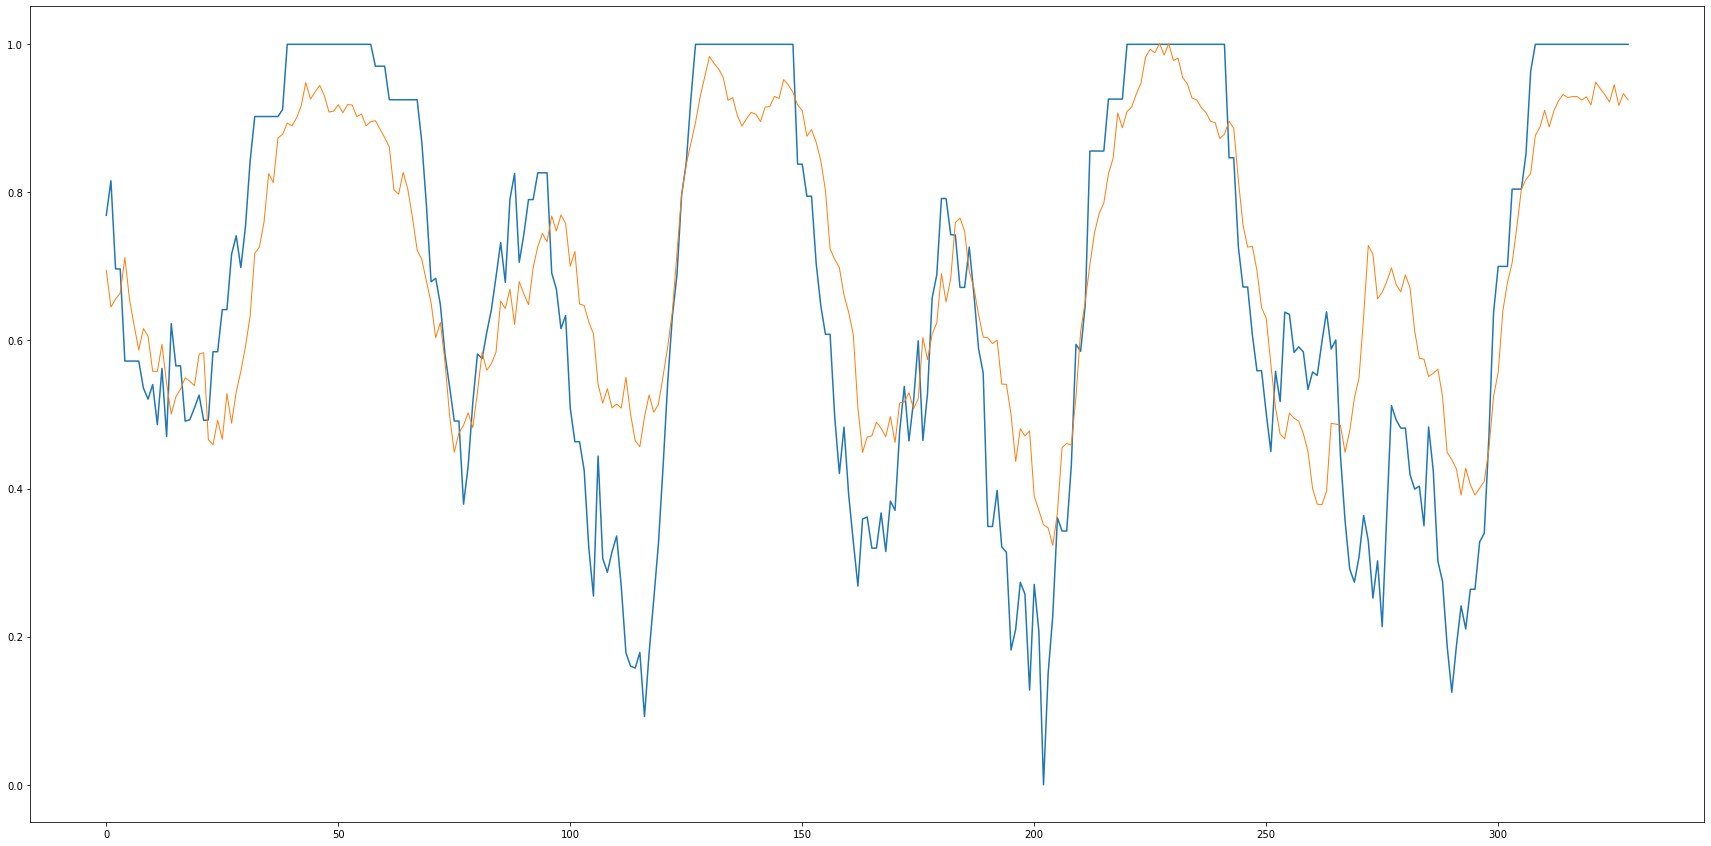

(330, 634)


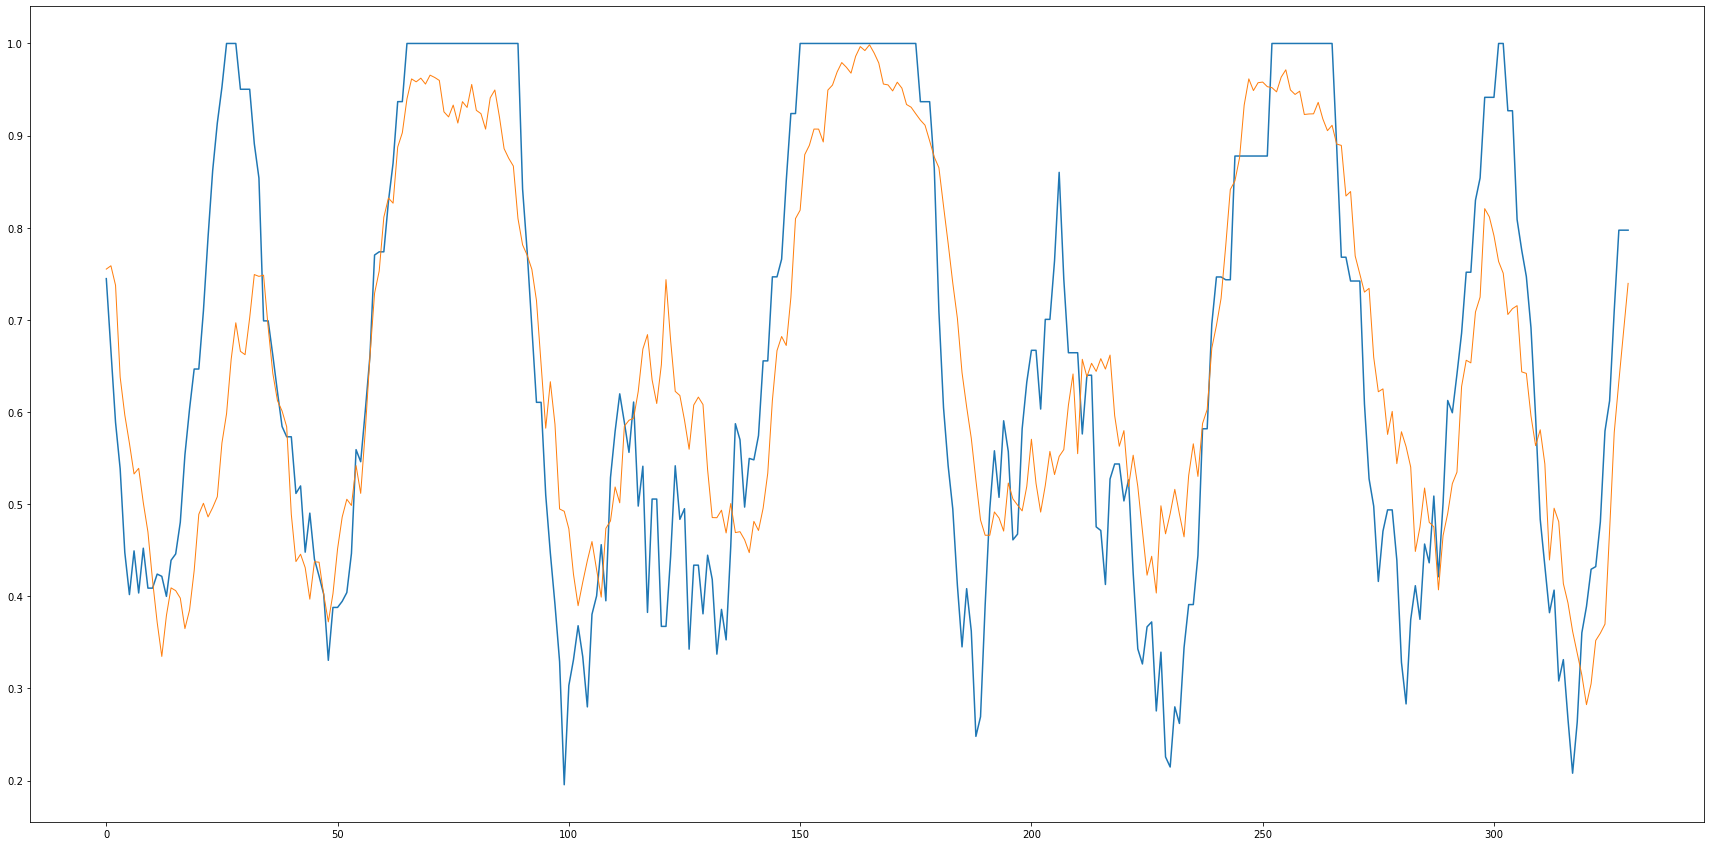

In [704]:
train,ds = train_test_split_smoothed(smoothed_df,0.5)
val,test = train_test_split_smoothed(ds,0.5)
model, mse_values ,trainPredict, validPredict, testPredict= train_model(5,170,train,val,test)

(664, 634)


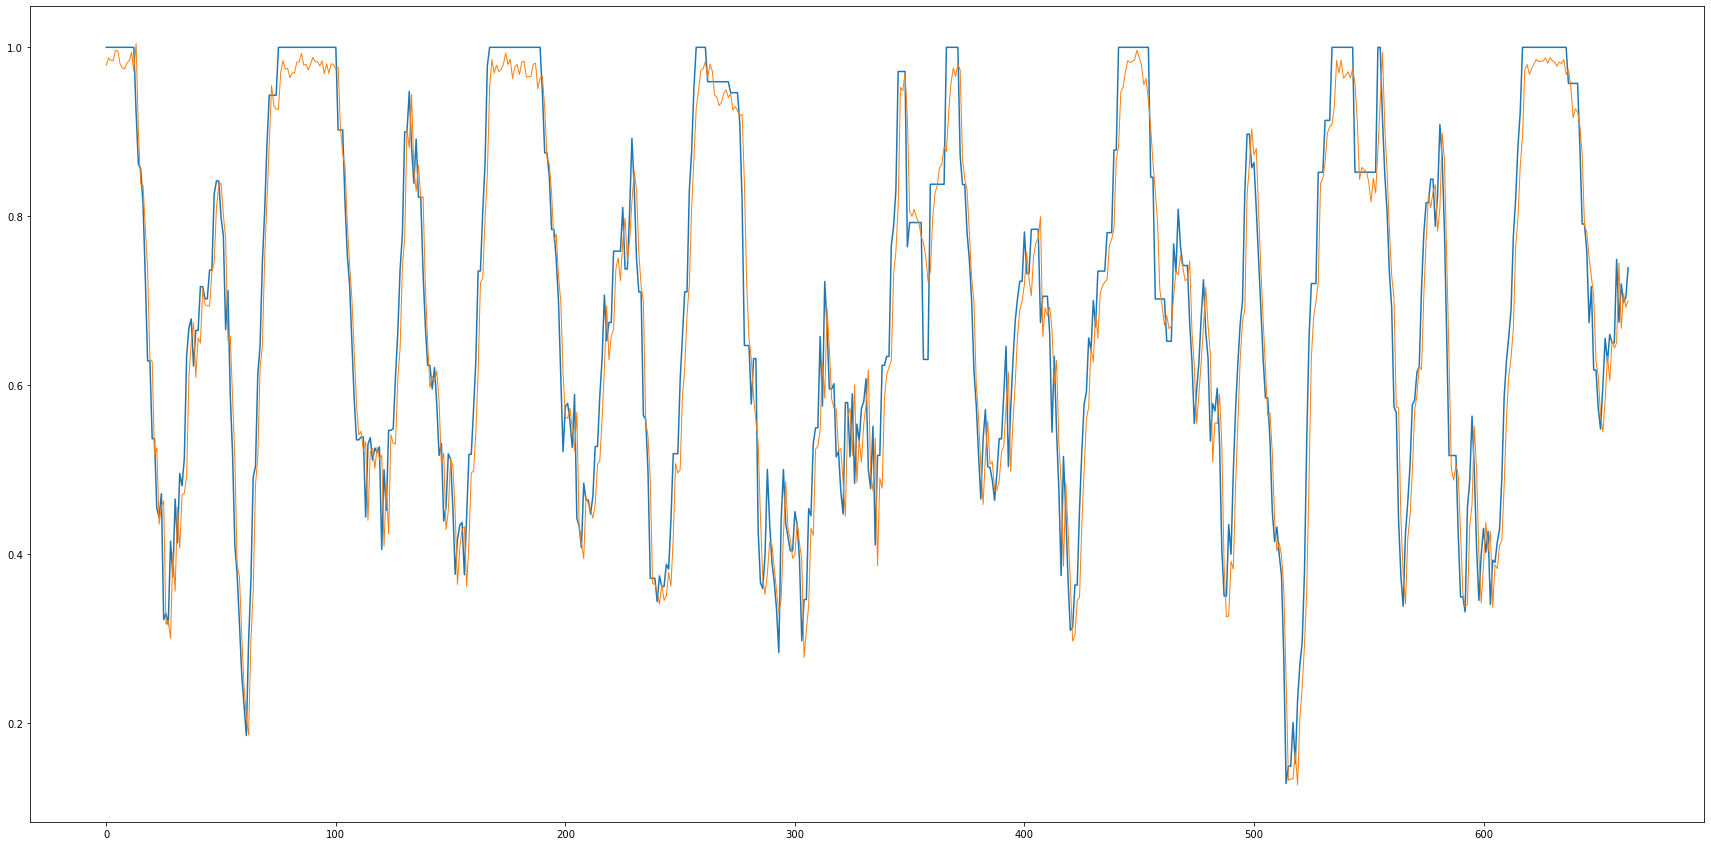

(329, 634)


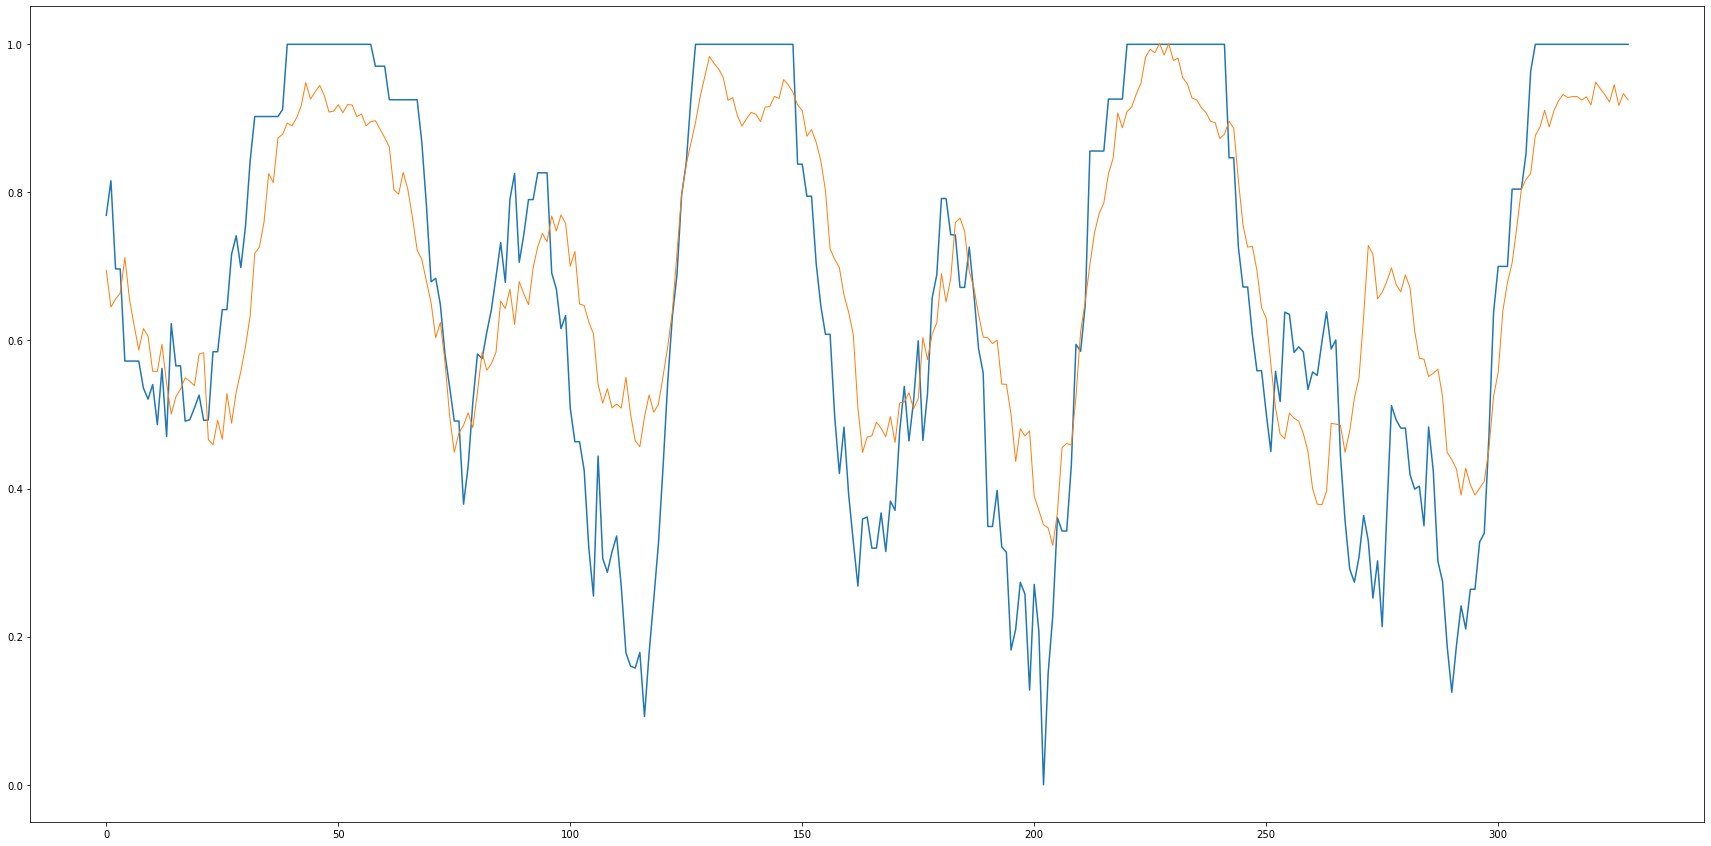

(330, 634)


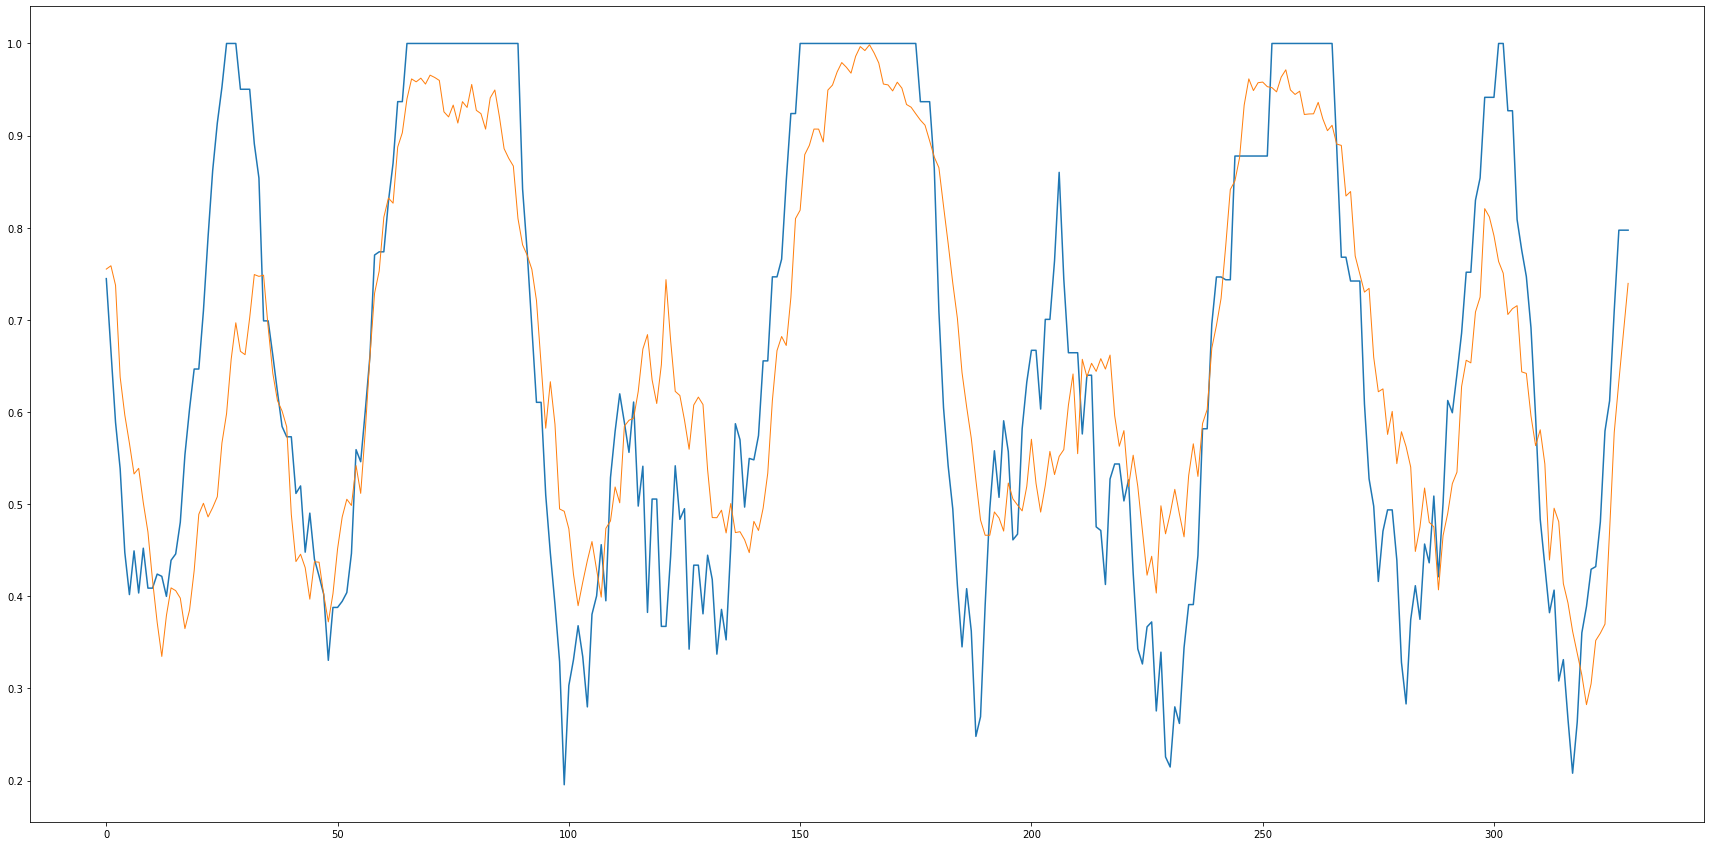

In [705]:
plot_graphs(train,trainPredict,5, 0)
plot_graphs(val,validPredict,5, 0)
plot_graphs(test,testPredict,5, 0)

In [711]:
PredictPlot = np.empty_like(smoothed_df)
PredictPlot[:, :] = np.nan
step = len(trainPredict) + 5 

trainPredictPlot = np.empty_like(smoothed_df)
trainPredictPlot[:, :] = np.nan

PredictPlot[5:step][:] = trainPredict
trainPredictPlot[5:step][:] = trainPredict

step_s = step +1 + 5
step_e = step_s + len(validPredict) 

validPredictPlot = np.empty_like(smoothed_df)
validPredictPlot[:, :] = np.nan
PredictPlot[step_s:step_e][:] = validPredict
validPredictPlot[step_s:step_e][:] = validPredict

step_s = step_e + 2 + 5 
# step_e = step_s + len(validPredict) + 5

testPredictPlot = np.empty_like(smoothed_df)
testPredictPlot[:, :] = np.nan
PredictPlot[step_s:][:] = testPredict
testPredictPlot[step_s:][:] = testPredict

In [714]:
Predict = scaler.inverse_transform(PredictPlot)
trainPredictPlot = scaler.inverse_transform(trainPredictPlot)
validPredictPlot = scaler.inverse_transform(validPredictPlot)
testPredictPlot = scaler.inverse_transform(testPredictPlot)
dataset = scaler.inverse_transform(smoothed_df)

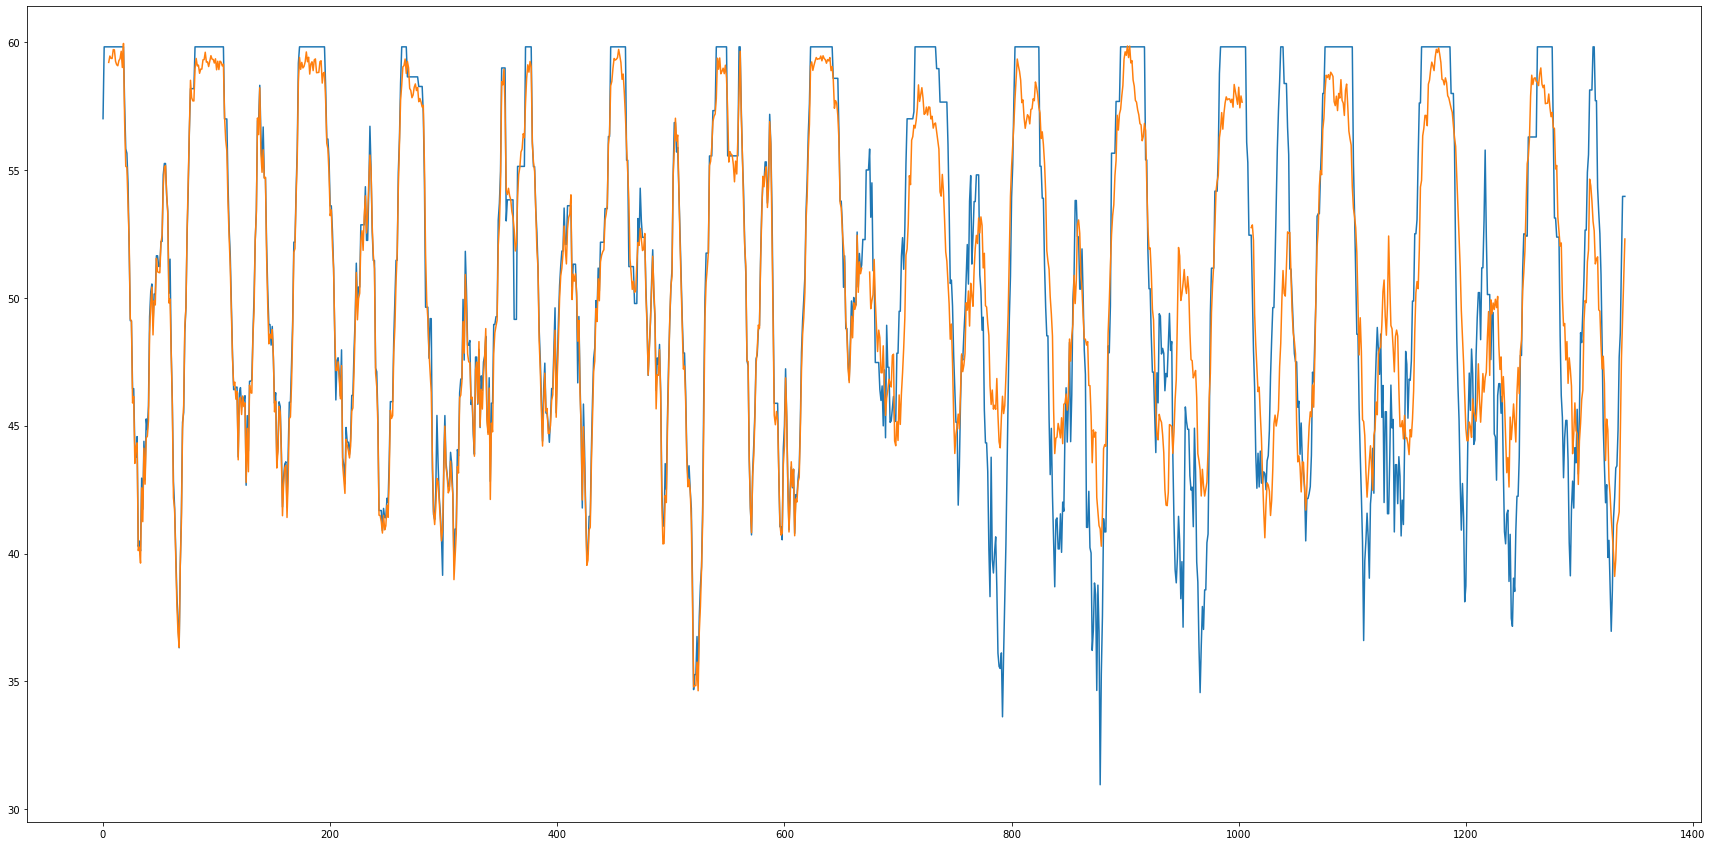

In [715]:
plt.plot(dataset[:,0])
# plt.plot(trainPredictPlot[:,0])
plt.plot(Predict[:,0])

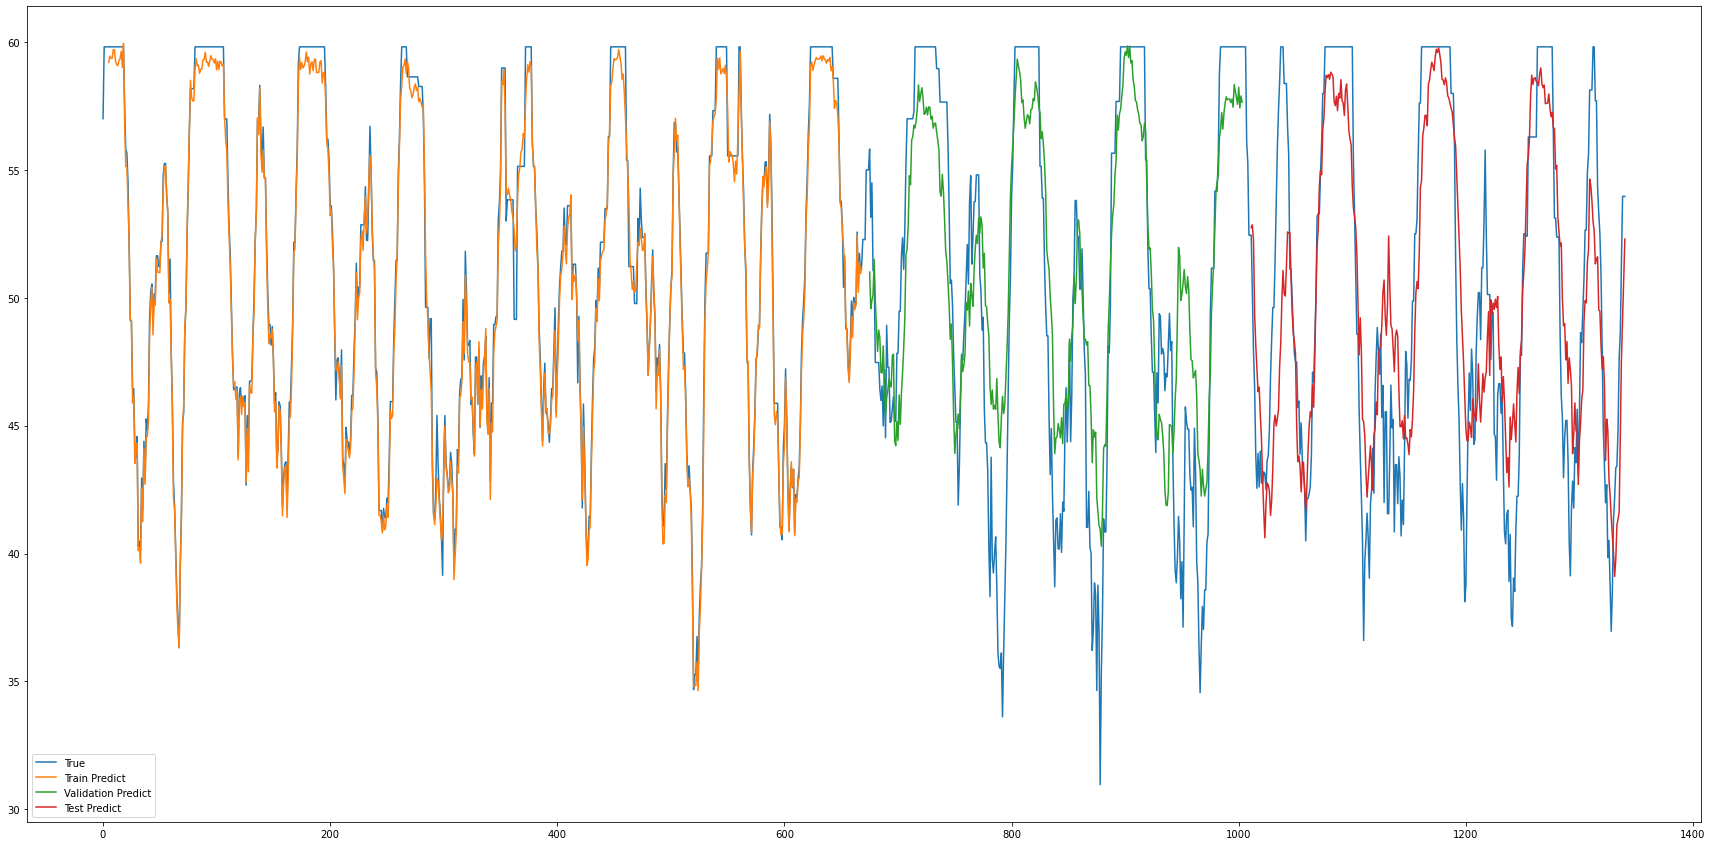

In [716]:
plt.plot(dataset[:,0])
plt.plot(trainPredictPlot[:,0])
plt.plot(validPredictPlot[:,0])
plt.plot(testPredictPlot[:,0])
plt.legend(['True','Train Predict','Validation Predict','Test Predict'],loc='best')
plt.show()

In [717]:
model.save("LSTMMultiEdges.h5")

## Prediction on the average city speed -unfinished

In [5]:
df = ds.drop(['coord','gpscoord','lane'],1)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\1701734751.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = ds.drop(['coord','gpscoord','lane'],1)


In [6]:
df = df.resample('3min').mean()
df

spdK/m  displacement   turnAngle      vehDen
dateandtime                                                         
2023-02-17 00:00:00  58.992090   2237.262857  196.483892   57.916256
2023-02-17 00:03:00  55.791728   1622.110226  205.790827   40.293233
2023-02-17 00:06:00  60.170339   1577.768110  178.990472   42.401575
2023-02-17 00:09:00  60.403732   1698.545423  213.101408   47.422535
2023-02-17 00:12:00  58.263913   1704.683490  201.942685   49.953020
...                        ...           ...         ...         ...
2023-02-17 23:45:00  59.454828   1832.952150  202.986542  107.523364
2023-02-17 23:48:00  59.053985   1795.112621  213.928220  103.077670
2023-02-17 23:51:00  52.242362   1850.092345  195.741552   97.234483
2023-02-17 23:54:00  51.196018   1822.018401  200.623323  106.799373
2023-02-17 23:57:00  55.394599   1882.953951  213.380031  108.487654

[480 rows x 4 columns]

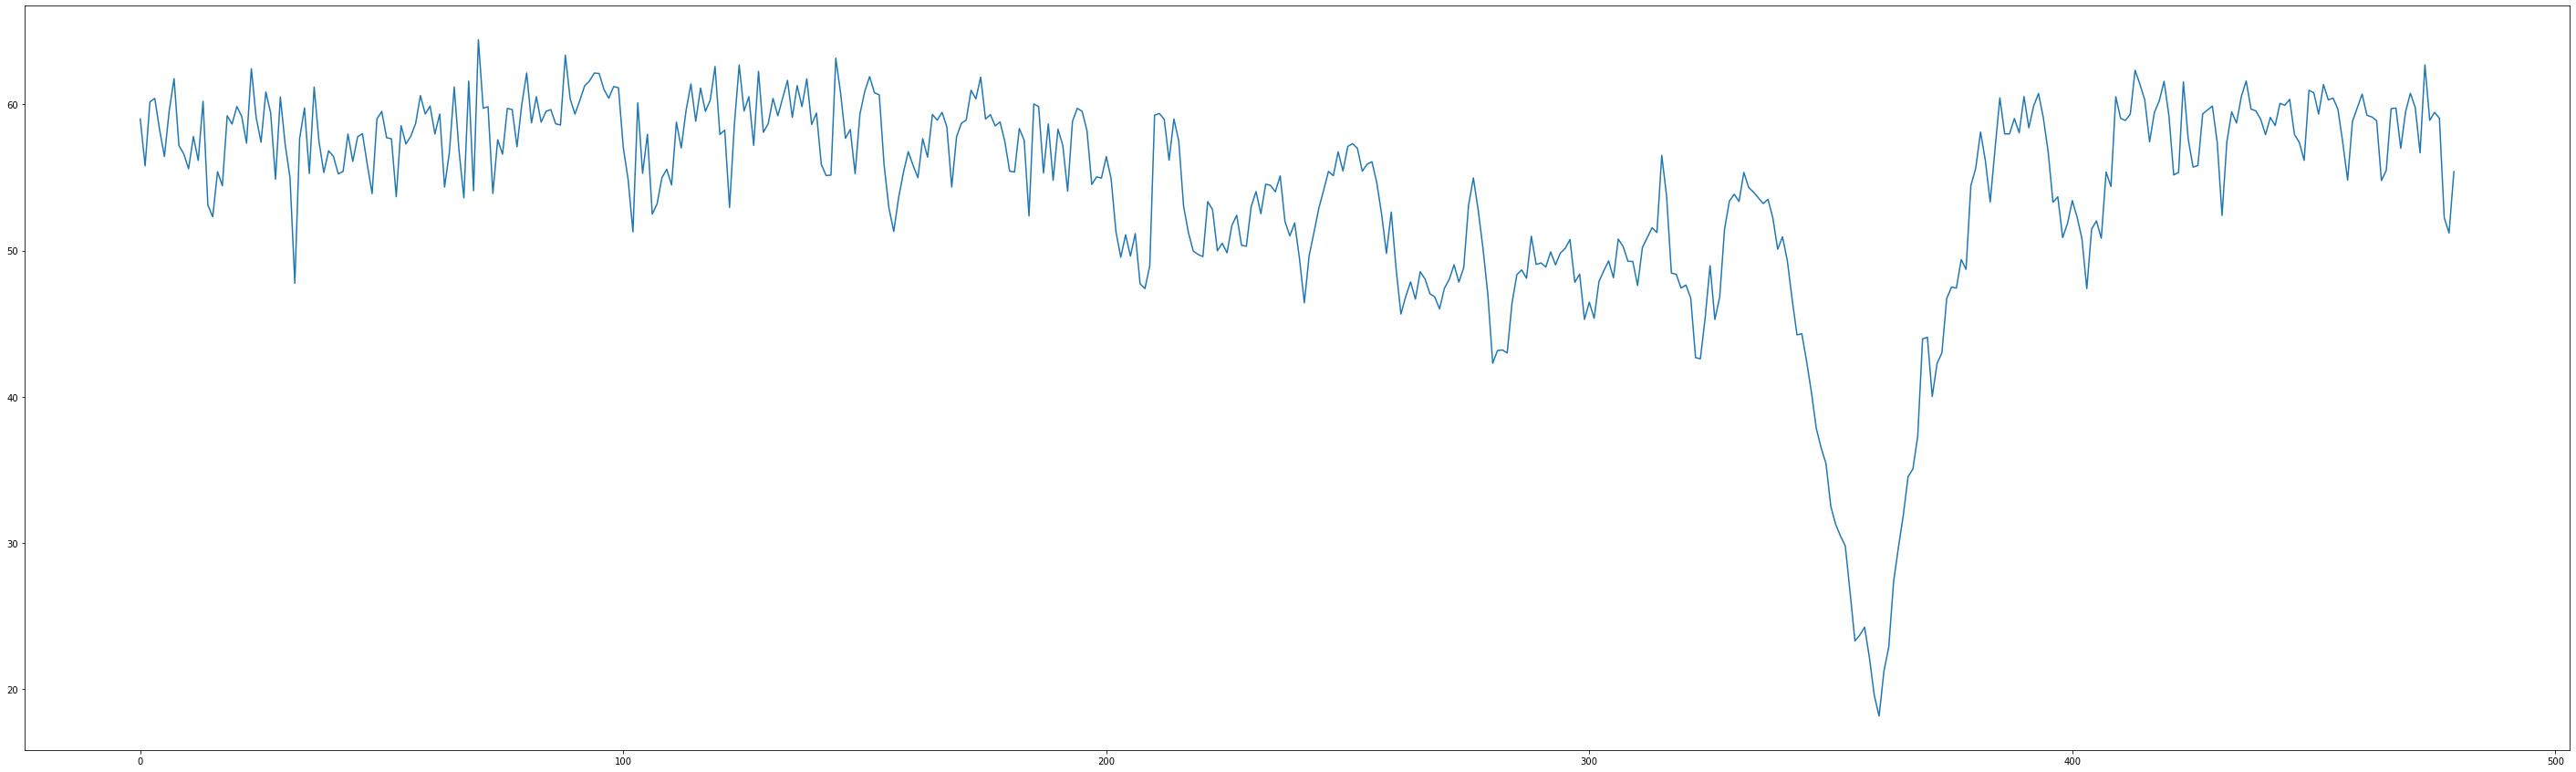

In [7]:
values = df.values
plt.rcParams["figure.figsize"] = (50,15)
plt.plot(values[:, 0])


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size

train  = df[0:train_size]
test   = df[train_size:]

In [10]:
scaler = MinMaxScaler()

train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['spdK/m']] = scaler.fit_transform(train[['spdK/m']])
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\103752761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['spdK/m']]  = scaler.fit_transform(test[['spdK/m']])


In [11]:
trainY = train['spdK/m']
testY  = test['spdK/m']

trainX = train.drop(['spdK/m'],1)
testX = test.drop(['spdK/m'],1)
trainX

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  trainX = train.drop(['spdK/m'],1)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2095176610.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  testX = test.drop(['spdK/m'],1)


displacement   turnAngle      vehDen
dateandtime                                              
2023-02-17 00:00:00   2237.262857  196.483892   57.916256
2023-02-17 00:03:00   1622.110226  205.790827   40.293233
2023-02-17 00:06:00   1577.768110  178.990472   42.401575
2023-02-17 00:09:00   1698.545423  213.101408   47.422535
2023-02-17 00:12:00   1704.683490  201.942685   49.953020
...                           ...         ...         ...
2023-02-17 18:57:00   1786.411093  197.825471  421.631829
2023-02-17 19:00:00   2023.805194  197.219635  429.465839
2023-02-17 19:03:00   1967.196782  191.184425  403.011580
2023-02-17 19:06:00   2074.263958  198.069887  385.130208
2023-02-17 19:09:00   1921.063419  199.318191  352.092803

[384 rows x 3 columns]

In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [13]:
# How many record to take into account
lookback = 5 #15mins
n_features = df.shape[-1]
batch_size = 1
generator = TimeseriesGenerator(trainX, trainY,
                                length=lookback, 
                                batch_size=batch_size)

test_data_gen = TimeseriesGenerator(testX, testY,
                                    length=lookback, 
                                    batch_size=batch_size)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [93]:
# define model
model = Sequential()
model.add(LSTM(50, return_sequences=False, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(200, return_sequences=True, activation='relu', input_shape=(None, trainX.shape[-1]))) 
#model.add(LSTM(100, return_sequences=False, activation='sigmoid', input_shape=(None, trainX.shape[-1]))) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [94]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 50)                10800     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [95]:
# fit model
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)

model.fit(generator,epochs=200, callbacks = es)

Epoch 1/200
379/379 [==============================] - 3s 2ms/step - loss: 7078.7109
Epoch 2/200
379/379 [==============================] - 1s 2ms/step - loss: 1227.3009
Epoch 3/200
379/379 [==============================] - 1s 2ms/step - loss: 438.4662
Epoch 4/200
379/379 [==============================] - 1s 2ms/step - loss: 3576.5002
Epoch 5/200
379/379 [==============================] - 1s 2ms/step - loss: 1018.1528
Epoch 6/200
379/379 [==============================] - 1s 2ms/step - loss: 737.1349
Epoch 7/200
379/379 [==============================] - 1s 2ms/step - loss: 192.8212
Epoch 8/200
379/379 [==============================] - 1s 2ms/step - loss: 456.0615
Epoch 9/200
379/379 [==============================] - 1s 2ms/step - loss: 273.7569
Epoch 10/200
379/379 [==============================] - 1s 2ms/step - loss: 432.7608
Epoch 11/200
379/379 [==============================] - 1s 2ms/step - loss: 198.0078
Epoch 12/200
379/379 [==============================] - 1s 2ms/step - 

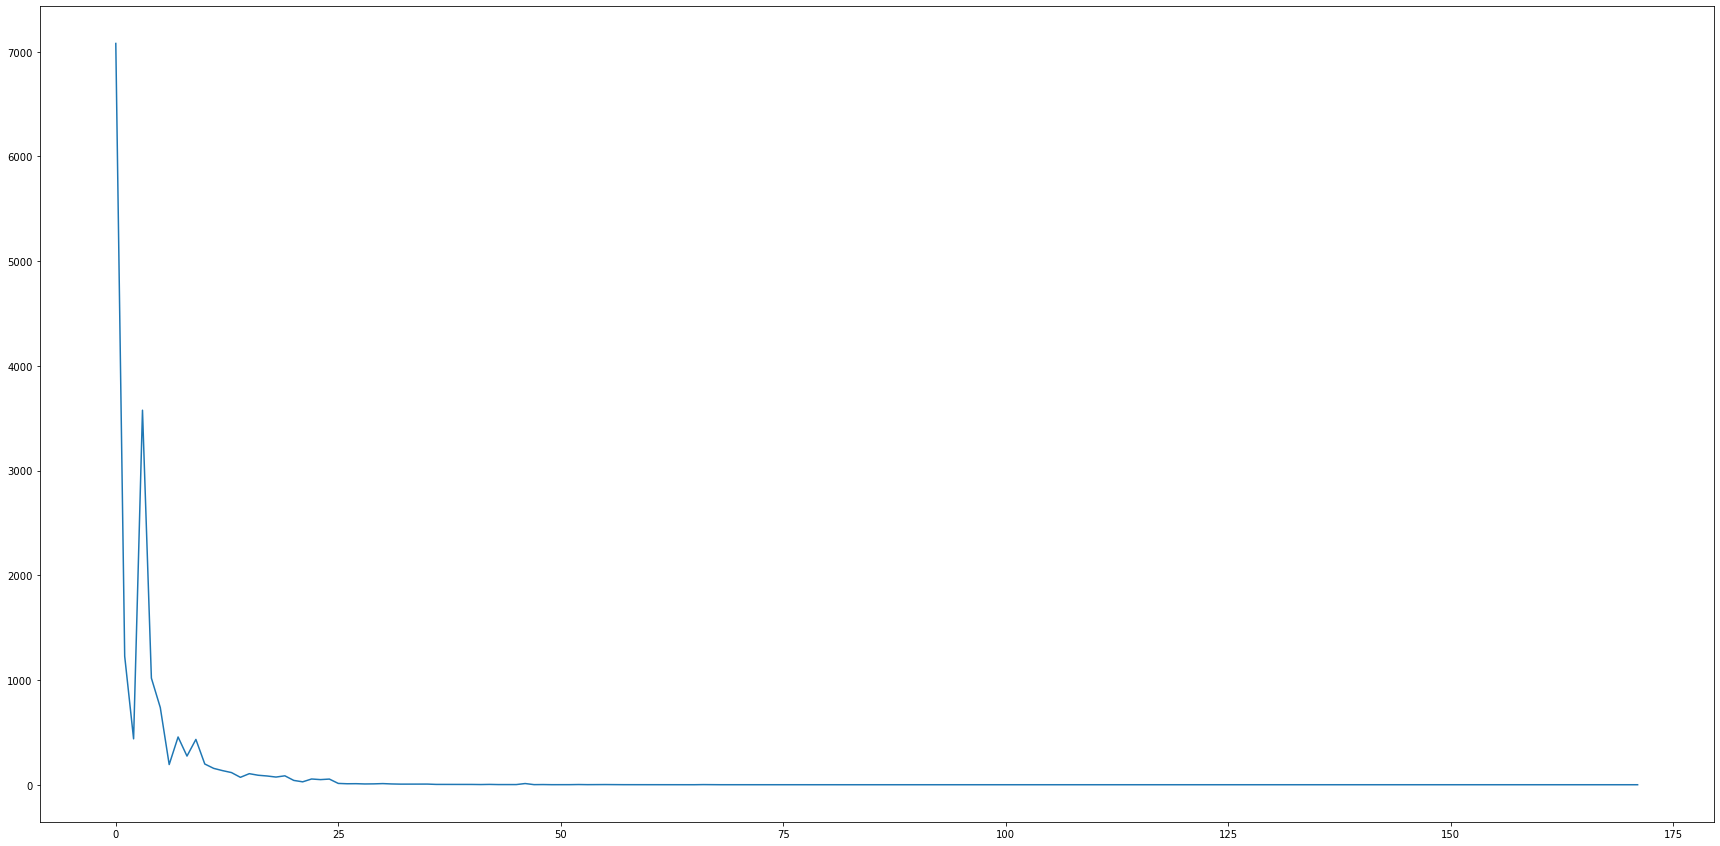

In [96]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [97]:
from tensorflow.keras.models import load_model


In [98]:
model.evaluate_generator(test_data_gen)
trainPredict = model.predict_generator(generator)
testPredict = model.predict_generator(test_data_gen)

C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_data_gen)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  trainPredict = model.predict_generator(generator)
C:\Users\Nourhan.DESKTOP-MSMUPKR\AppData\Local\Temp\ipykernel_31396\2401074546.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  testPredict = model.predict_generator(test_data_gen)


In [99]:
test_predictions = []
for i in range(len(testPredict)):
    
    # get the prediction value for the first batch
    current_pred = testPredict[i,0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 


In [100]:
train_predictions = []
for i in range(len(trainPredict)):
    
    # get the prediction value for the first batch
    current_pred = trainPredict[i,0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    


In [101]:
#true_predictionsTr = scaler.inverse_transform(test_predictions)
#true_predictionsTs = scaler.inverse_transform(train_predictions)


In [102]:
preds = np.concatenate((true_predictionsTs, true_predictionsTr), axis=0)


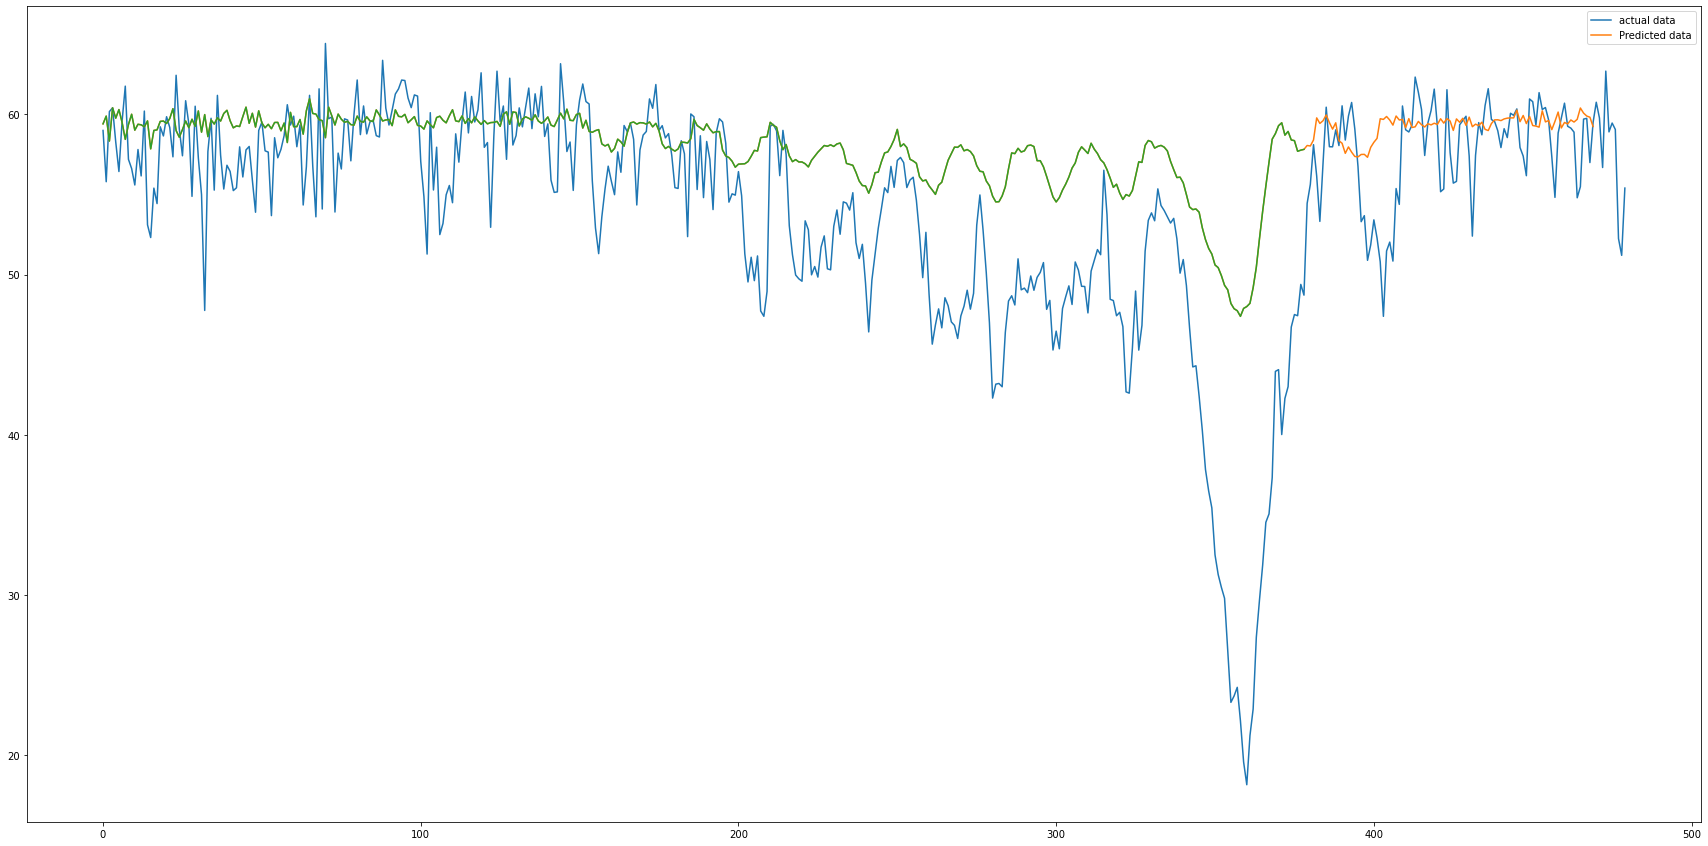

In [92]:
#plt.plot(trainY)
plt.rcParams["figure.figsize"] = (30,15)
plt.plot(values[:, 0])
plt.plot(preds)
plt.plot(true_predictionsTs)
plt.legend(['actual data','Predicted data'],loc='best')
plt.show()

In [262]:
model.save("steepVanillaLSTM3min.h5")